# 2023.08.15.

In [1]:
import sys

full_path_to_modul_dir = 'D:\mcbj_stmbj'  # here enter the full path to the directory that contains the modul on your computer
sys.path.append(full_path_to_modul_dir)

In [ ]:
from mcbj import *
from pca_and_ml import *
from noise import *
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
import pandas as pd

import plots
import filter_traces

date = "23_08_15"
sample_rate = 50_000
home_folder = Path(f"D:/BJ_Data/{date}")
# home_folder = Path(f"//DATACENTER/BreakJunction_group/BJ_Data/{date}")

Some formatting here, click on the "..." to reveal

In [ ]:
rcParams['figure.constrained_layout.use'] = False
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['mathtext.fontset'] = 'stix'
rcParams['mathtext.rm'] = 'serif'
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['xtick.major.pad'] = 4
rcParams['xtick.minor.pad'] = 0.5
rcParams['ytick.major.pad'] = 2
rcParams['ytick.minor.pad'] = 0.5
rcParams['axes.labelsize'] = 10
rcParams['axes.titlepad'] = 8.0
rcParams['axes.labelpad'] = 2.0
rcParams['agg.path.chunksize'] = 10000

In [ ]:
rcParams['font.size'] = 14
rcParams['ytick.labelsize'] = 10
rcParams['xtick.labelsize'] = 10
rcParams['axes.labelsize'] = 10

In [ ]:
from matplotlib.collections import LineCollection

cmap_geo32_opaque = ListedColormap(np.array([[255 / 255, 255 / 255, 255 / 255, 1],
                                             [255 / 255, 235 / 255, 235 / 255, 1],
                                             [255 / 255, 215 / 255, 215 / 255, 1],
                                             [255 / 255, 196 / 255, 196 / 255, 1],
                                             [245 / 255, 179 / 255, 174 / 255, 1],
                                             [255 / 255, 158 / 255, 158 / 255, 1],
                                             [255 / 255, 124 / 255, 124 / 255, 1],
                                             [255 / 255, 90 / 255, 90 / 255, 1],
                                             [238 / 255, 80 / 255, 78 / 255, 1],
                                             [244 / 255, 117 / 255, 75 / 255, 1],
                                             [255 / 255, 160 / 255, 69 / 255, 1],
                                             [255 / 255, 189 / 255, 87 / 255, 1],
                                             [247 / 255, 215 / 255, 104 / 255, 1],
                                             [240 / 255, 236 / 255, 121 / 255, 1],
                                             [223 / 255, 245 / 255, 141 / 255, 1],
                                             [205 / 255, 255 / 255, 162 / 255, 1],
                                             [172 / 255, 245 / 255, 168 / 255, 1],
                                             [138 / 255, 236 / 255, 174 / 255, 1],
                                             [124 / 255, 235 / 255, 200 / 255, 1],
                                             [106 / 255, 235 / 255, 225 / 255, 1],
                                             [97 / 255, 225 / 255, 240 / 255, 1],
                                             [68 / 255, 202 / 255, 255 / 255, 1],
                                             [50 / 255, 190 / 255, 255 / 255, 1],
                                             [25 / 255, 175 / 255, 255 / 255, 1],
                                             [13 / 255, 129 / 255, 248 / 255, 1],
                                             [26 / 255, 102 / 255, 240 / 255, 1],
                                             [0 / 255, 40 / 255, 224 / 255, 1],
                                             [0 / 255, 25 / 255, 212 / 255, 1],
                                             [0 / 255, 10 / 255, 200 / 255, 1],
                                             [20 / 255, 5 / 255, 175 / 255, 1],
                                             [40 / 255, 0 / 255, 150 / 255, 1],
                                             [10 / 255, 0 / 255, 121 / 255, 1]]))

| **Start** | **End** |            **Settings**                           | **Setup** | **Sample** | **Pressure, temperature** | **Note**        |
|-----------|---------|---------------------------------------------------|-----------|------------|---------------------------|-----------------|
|           |         | bias_offset=0.0019 V <br> R_ser = 100200 Ohm <br> current_offset= 77.2064 pA |    STM    |     Au     |       ambient, room       | Freshly cut tip and new gold plate (Bence) |
|  |  |  |  |  |  |  |
|      1    |    424  |HOLD OFF <br> rate=2; <br> pull_exc=1.0, push_exc=1.0 <br> lowG=1e-5, highG=10|  |  |  | |
|    425    |    972  |HOLD OFF <br> current_offset=21.1642 pA            |  |  |  | Reshaped the tip used from 1 to 424 (Bence) |
|    973    |   1022  |HOLD OFF <br> same as before                       |  |  |  | BPY evaporation |
|   1023    |   1200  |HOLD OFF <br> piezo_rate: 1mm/sec <br> piezo_x_y=(0,0)     |  |  |  | |
|   1201    |   1501  |HOLD OFF <br> bias_offset=0.00185 V <br> R_ser=100100 Ohm <br> current_offset=78.3915 pA <br> piezo_rate=1 <br> pull_exc=1, push_exc=1 <br> lowG=1e-5, highG=10|  |  |  | measurement after a lot of `****`ing with the sample holder (resoldering, etc). <br> **history**: on Tuesday the off set was very high, maxbe due to some contact issue. <br> The off set is still high, but the piezo shielding isn't connected. <br> **about the measurement**: freshly cut tip, "old" sample from yesterday with molecules <br> (I saw the molecules under the microscope, but their structure was different). <br> At the beginning, the traces were good, but the histogram has a very strange peak around $0.1\;G_{0}$.               |
|   1502    |   2502  |current_offset=135.424 pA                     |           |            |                           | piezo "plate" connected to the ground; <br> offset and noise level seems ok, but a bit strange.. <br> when the z piezo wans't connected, very large noise level was observed. <br> But after I connected z piezo, the huge noise has gone. <br> + the z piezo voltage affects the off-set, at high voltage the off set was higher <br> (I used this value for compensation, aka calibrate) <br> **MEASUREMENT:** finally a relatively good measurement! <br> Nice BPY peaks on the histogram. See print screens in the folder. |
|   2503    |   2656  |HOLD ON <br> rate=1 <br> pull_exc=0.5, push_exc=1 <br> pull_hold=2e-3, push_hold=5e-4|           |            |                           | long (3s) 100mV hold meas, <br> nice plateaus on pull hold traces, but it isn't too stable. <br> Maybe decreasing the rate could help.             |
|   2657    |   2961  |HOLD ON <br> rate=0.2 <br> pull_exc=0.2, push_exc=0.5 <br> pull_hold=2e-3, push_hold=5e-4|           |            |                           | same measurement but with lower rate             |
|   2962    |   3169  |HOLD OFF <br> rate=1 <br> pull_exc=0.2, push_exc=0.5 <br> current_offset=135.424 pA |  |  |  | simple histogram measurement after hold measurement  |
|   3170    |   3678  |HOLD ON <br> current_offset=43.1781 pA <br> pull_hold=2e-3, push_hold=5e-4|           |            |                           |  **new position** (20V,20V), very nice BPY histogram, see the print screen, the off set is relatively high, but the measurement works            |
|   3679    |   3700  |HOLD ON <br> pull_hold=2e-3, push_gold=5e-4|  |  |  |  Hold meas IV + noise IV, 2V max; 2V seems too high, change to 1V  |
|   3701    |   4702  |HOLD ON <br> pull_hold=2e-3, push_gold=5e-4|  |  |  |  same as before, but max ampl = 1V            |
|   4703    |   5504  |HOLD OFF |  |  |  |  nice BPY            |
|   5505    |   7727  |HOLD ON <br> rate=0.2 <br> pull_exc=0.2, push_exc=0.5 <br> current_offset=110.269pA <br> pull_hold=5e-4, push_hold=2e-3  |           |            |                           |  IV + IV noise measurement (1V) with a inverted IV (it begins with the negative part) |
|   7728    |   7728  |HOLD OFF <br> rate=1 <br> pull_exc=0.2, push_exc=0.5 <br> current_offset=110.269 pA    |  |  |  | bad measurement |
|   7729    |   9112  |HOLD OFF <br> rate=1 <br> pull_exc=0.2, push_exc=0.5 <br> current_offset=179.881 pA    |  |  |  | something wrong with the z piezo; <br> the piezo voltage affects the measured signal (worse than before). <br> I set the z voltage range to -2V,2V indstead of -10V,10V, i.e. the piezo voltage range is smaller now. <br> It helps to set better off set, but high noise appears on the traces. Molecular like, but bad histogram. :(|
|   9113    |   9124  |HOLD ON <br> rate=0.2 <br> pull_exc=0.2, push_exc=0.5 <br> current_offset=179.881 pA <br> pull_hold=5e-4, push_hold=2e-3 |  |  |  |  |

In [11]:
hist_au_1 = Histogram(folder=home_folder,
                      start_trace = 1, end_trace = 424,
                      conductance_range=(1e-5, 10),
                      conductance_bins_num=20,
                      conductance_bins_mode='decade')

In [12]:
hist_au_1.calc_stats(align_at=0.1,
                     range_pull=(-0.15, 0.15),
                     range_push=(-0.5, 1.2))

  0%|          | 0/424 [00:00<?, ?it/s]

Pull 2D histogram created from 422 traces
Push 2D histogram created from 422 traces


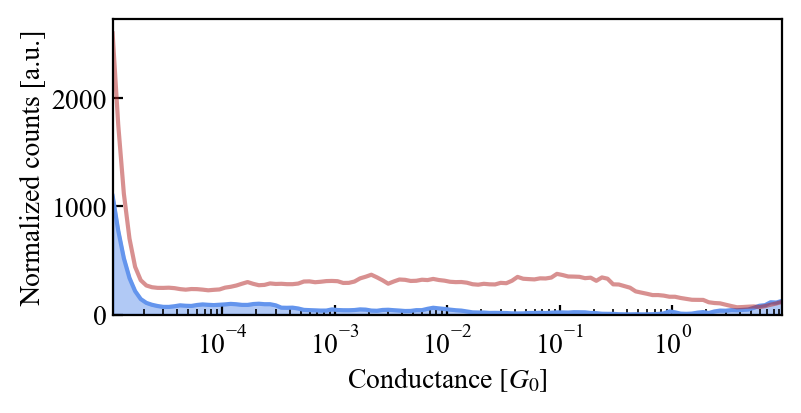

In [13]:
ax = hist_au_1.plot_hist_1d(dpi=200)
# ax.set_ylim(0, 400)

(<AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>)

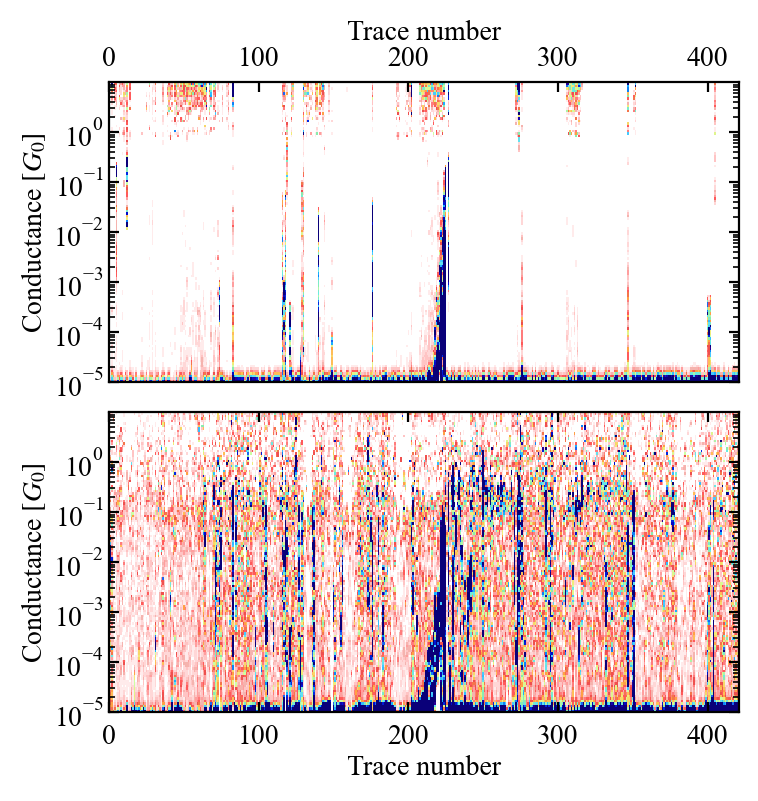

In [14]:
hist_au_1.plot_temporal_hist(dpi=200, vmax_pull=1000, vmax_push=1000)

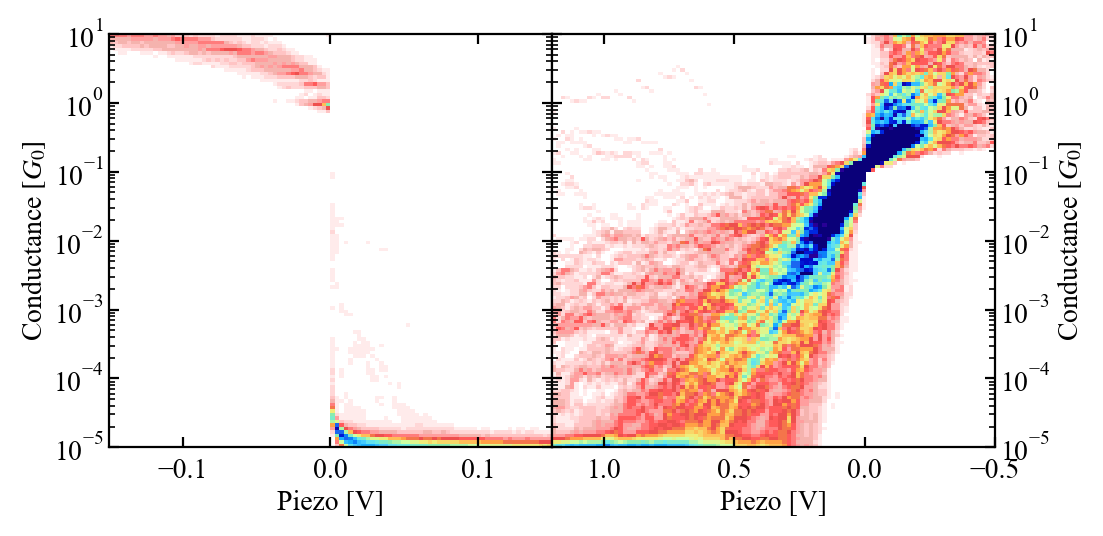

In [18]:
ax_pull, ax_push = hist_au_1.plot_hist_2d_both(dpi=200, vmax=5000)

In [26]:
hist_au_2 = Histogram(folder=home_folder,
                      start_trace = 425, end_trace = 972,
                      conductance_range=(1e-5, 10),
                      conductance_bins_num=20,
                      conductance_bins_mode='decade')

In [27]:
hist_au_2.calc_stats(align_at=0.1,
                     range_pull=(-0.05, 0.25),
                     range_push=(-0.5, 1.5))

  0%|          | 0/548 [00:00<?, ?it/s]

Pull 2D histogram created from 548 traces
Push 2D histogram created from 548 traces


(0.0, 2000.0)

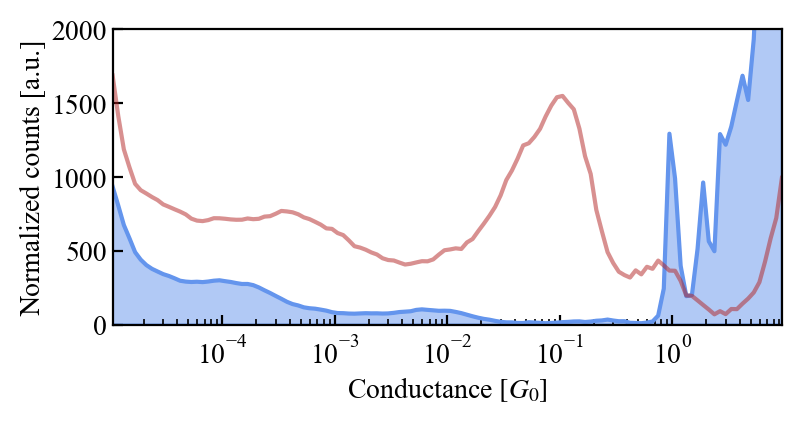

In [28]:
ax = hist_au_2.plot_hist_1d(dpi=200)
ax.set_ylim(0, 2000)

(<AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>)

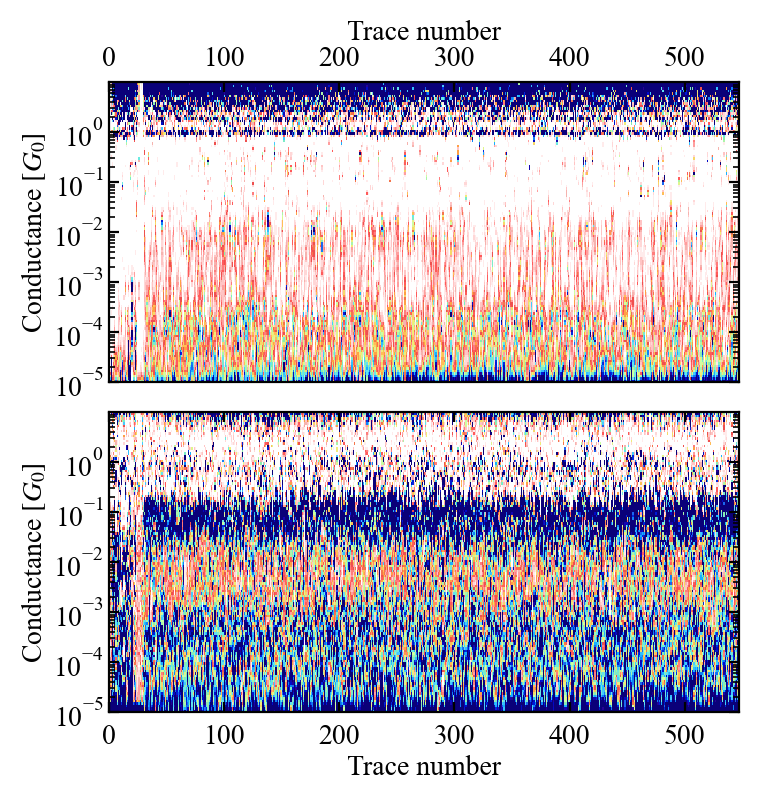

In [29]:
hist_au_2.plot_temporal_hist(dpi=200, vmax_pull=1000, vmax_push=1000)

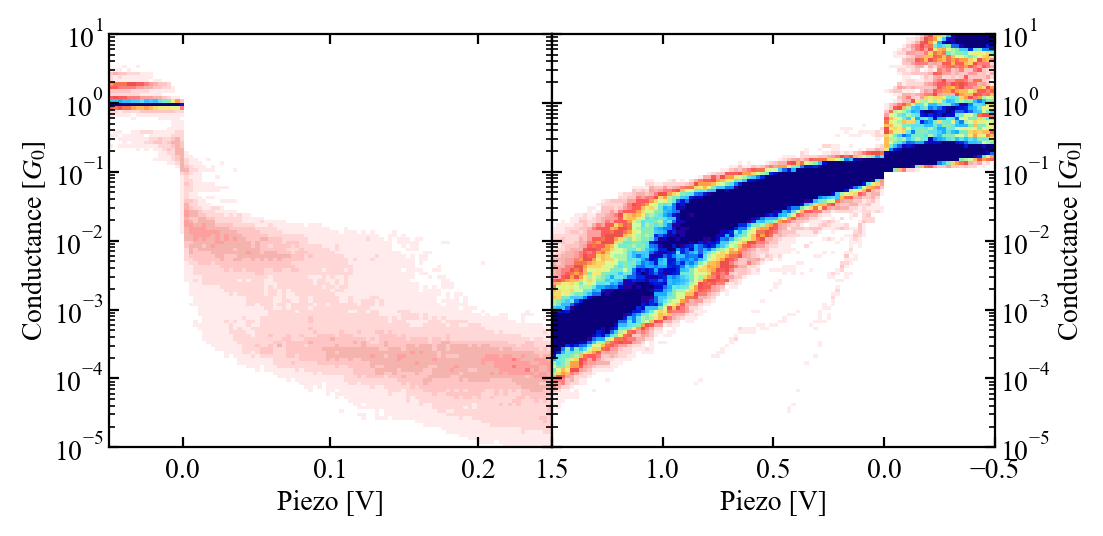

In [30]:
ax_pull, ax_push = hist_au_2.plot_hist_2d_both(dpi=200, vmax=10000)

# 973-1022 Right after evaporation

In [31]:
hist_bpy_1 = Histogram(folder=home_folder,
                      start_trace = 973, end_trace = 1022,
                      conductance_range=(1e-5, 10),
                      conductance_bins_num=20,
                      conductance_bins_mode='decade')

In [32]:
hist_bpy_1.calc_stats(align_at=0.1,
                     range_pull=(-0.05, 0.25),
                     range_push=(-0.5, 1.5))

  0%|          | 0/50 [00:00<?, ?it/s]

Pull 2D histogram created from 50 traces
Push 2D histogram created from 50 traces


(0.0, 200.0)

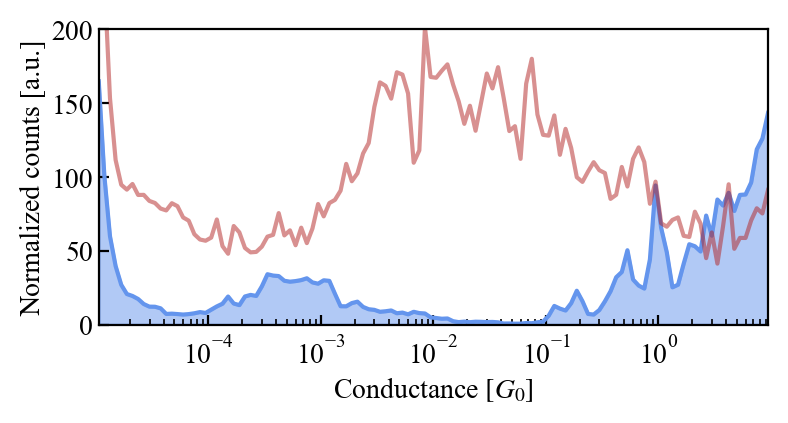

In [34]:
ax = hist_bpy_1.plot_hist_1d(dpi=200)
ax.set_ylim(0, 200)

(<AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>)

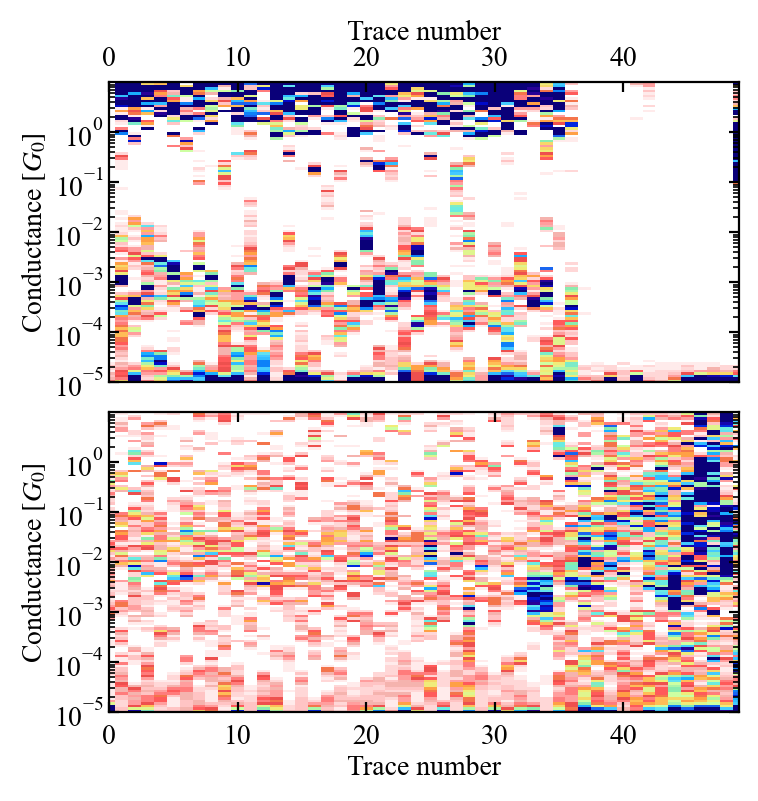

In [37]:
hist_bpy_1.plot_temporal_hist(dpi=200, vmax_pull=100, vmax_push=500)

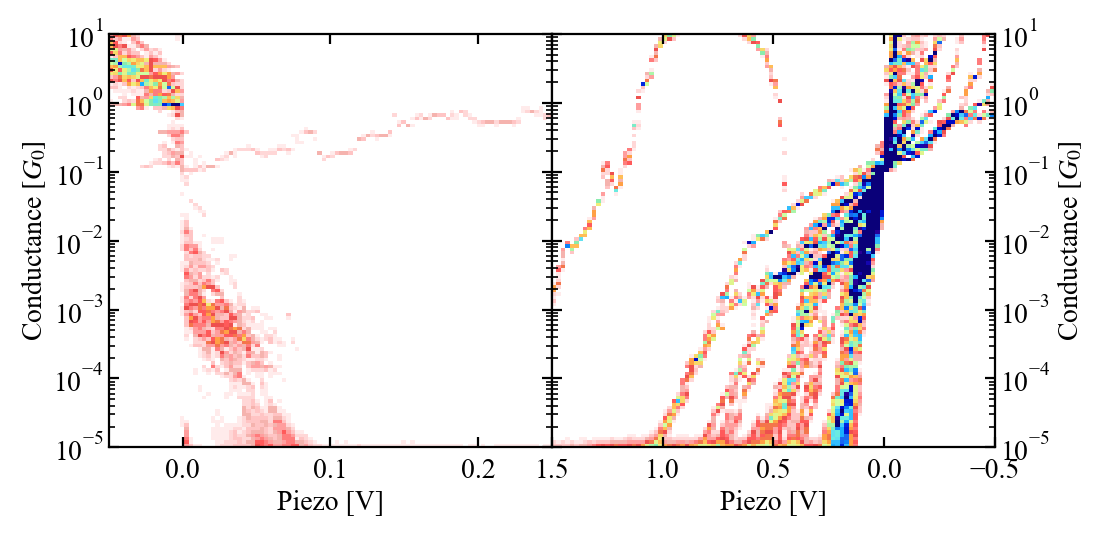

In [39]:
ax_pull, ax_push = hist_bpy_1.plot_hist_2d_both(dpi=200, vmax=500)

# 1023-1200

In [40]:
hist_bpy_2 = Histogram(folder=home_folder,
                      start_trace = 1023, end_trace = 1200,
                      conductance_range=(1e-5, 10),
                      conductance_bins_num=20,
                      conductance_bins_mode='decade')

In [41]:
hist_bpy_2.calc_stats(align_at=0.1,
                     range_pull=(-0.05, 0.25),
                     range_push=(-0.5, 1.5))

  0%|          | 0/178 [00:00<?, ?it/s]

Pull 2D histogram created from 171 traces
Push 2D histogram created from 171 traces


(0.0, 1000.0)

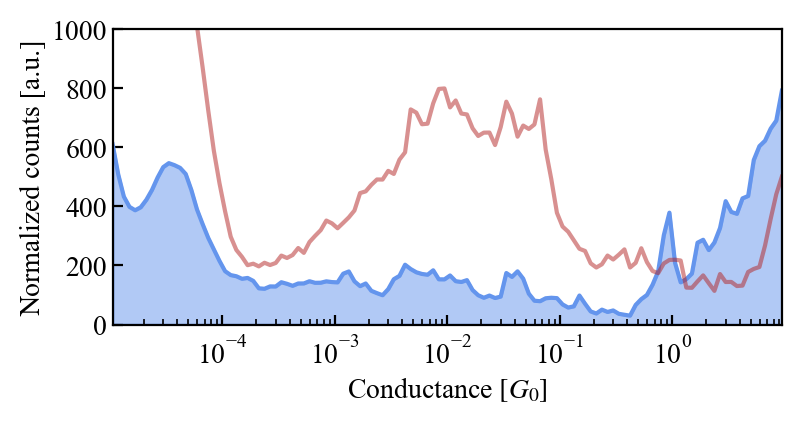

In [43]:
ax = hist_bpy_2.plot_hist_1d(dpi=200)
ax.set_ylim(0, 1000)

(<AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>)

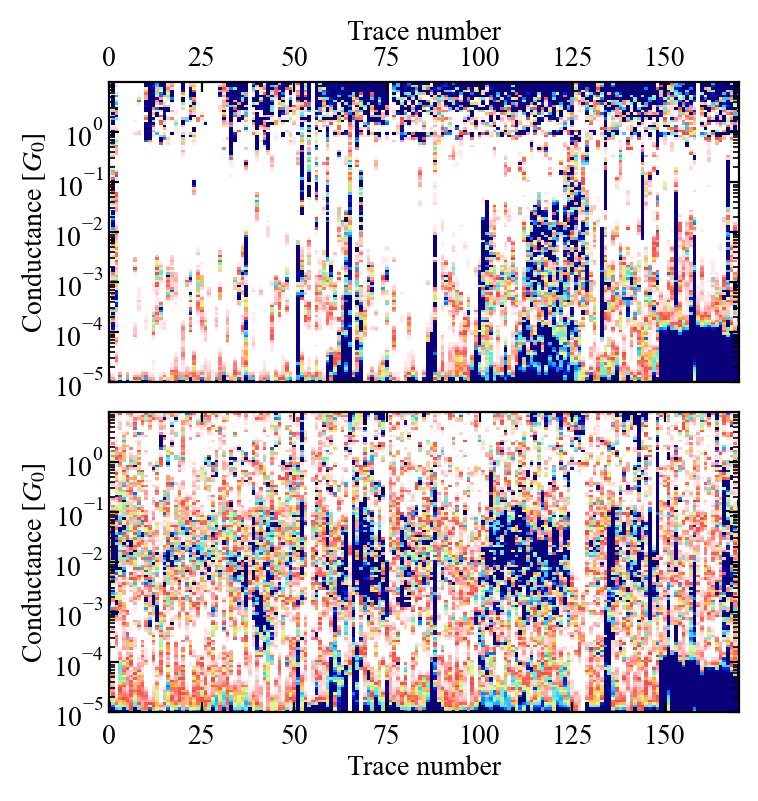

In [45]:
hist_bpy_2.plot_temporal_hist(dpi=200, vmax_pull=500, vmax_push=1000)

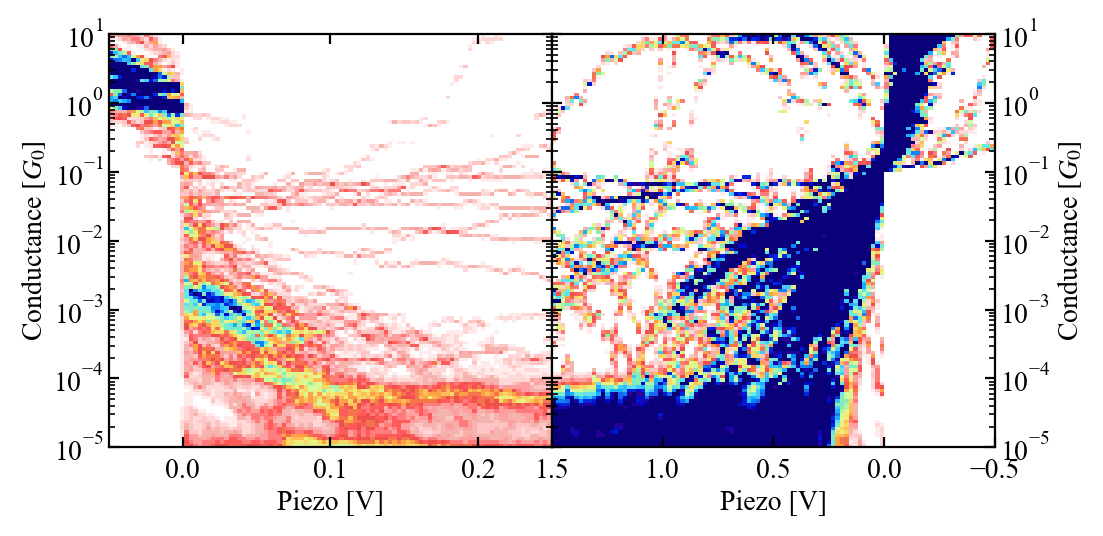

In [46]:
ax_pull, ax_push = hist_bpy_2.plot_hist_2d_both(dpi=200, vmax=1000)

# 1201-1501

In [47]:
hist_bpy_3 = Histogram(folder=home_folder,
                      start_trace = 1201, end_trace = 1501,
                      conductance_range=(1e-5, 10),
                      conductance_bins_num=20,
                      conductance_bins_mode='decade')

In [48]:
hist_bpy_3.calc_stats(align_at=0.1,
                     range_pull=(-0.05, 0.25),
                     range_push=(-0.5, 1.5))

  0%|          | 0/301 [00:00<?, ?it/s]

Pull 2D histogram created from 301 traces
Push 2D histogram created from 301 traces


(0.0, 1000.0)

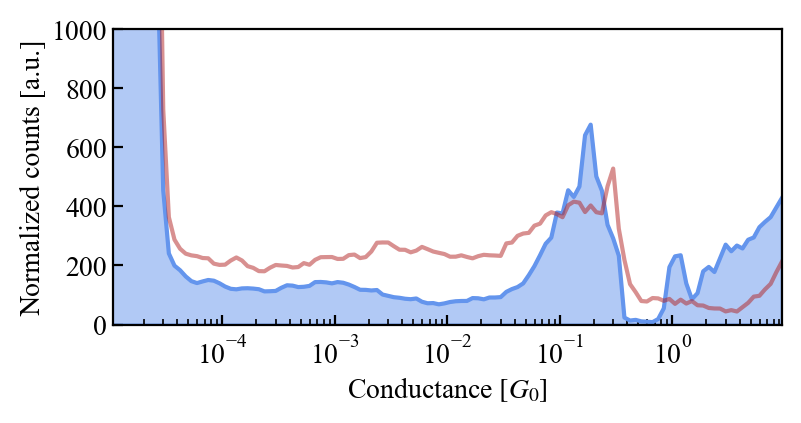

In [49]:
ax = hist_bpy_3.plot_hist_1d(dpi=200)
ax.set_ylim(0, 1000)

(<AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>)

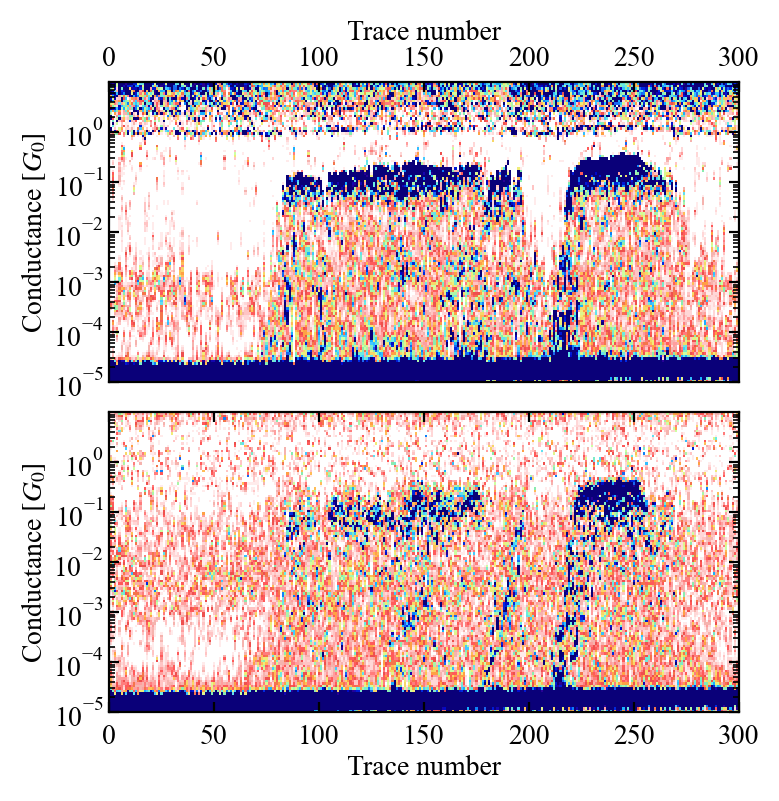

In [50]:
hist_bpy_3.plot_temporal_hist(dpi=200, vmax_pull=500, vmax_push=1000)

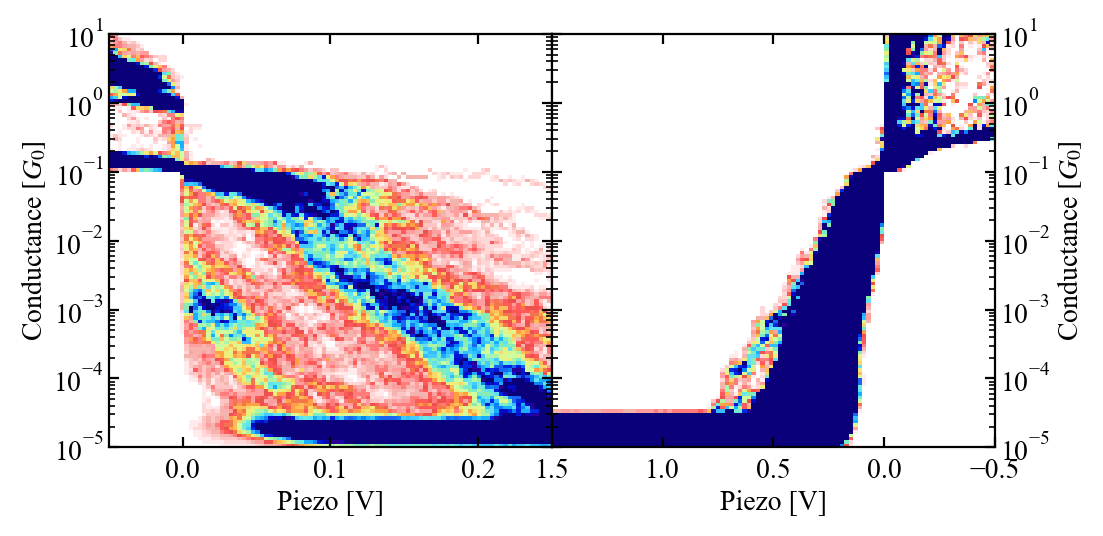

In [51]:
ax_pull, ax_push = hist_bpy_3.plot_hist_2d_both(dpi=200, vmax=1000)

# 1502-2502

In [52]:
hist_bpy_4 = Histogram(folder=home_folder,
                      start_trace = 1502, end_trace = 2502,
                      conductance_range=(1e-5, 10),
                      conductance_bins_num=20,
                      conductance_bins_mode='decade')

In [53]:
hist_bpy_4.calc_stats(align_at=0.1,
                     range_pull=(-0.05, 0.25),
                     range_push=(-0.5, 1.5))

  0%|          | 0/1001 [00:00<?, ?it/s]

Pull 2D histogram created from 1001 traces
Push 2D histogram created from 1001 traces


(0.0, 500.0)

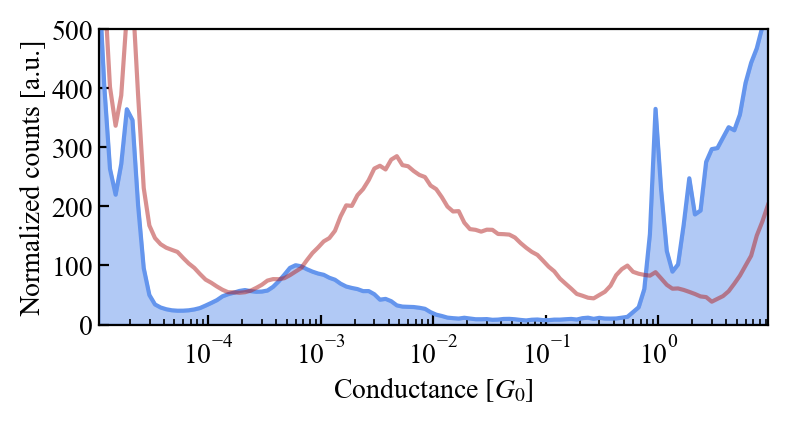

In [57]:
ax = hist_bpy_4.plot_hist_1d(dpi=200)
ax.set_ylim(0, 500)

(<AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>)

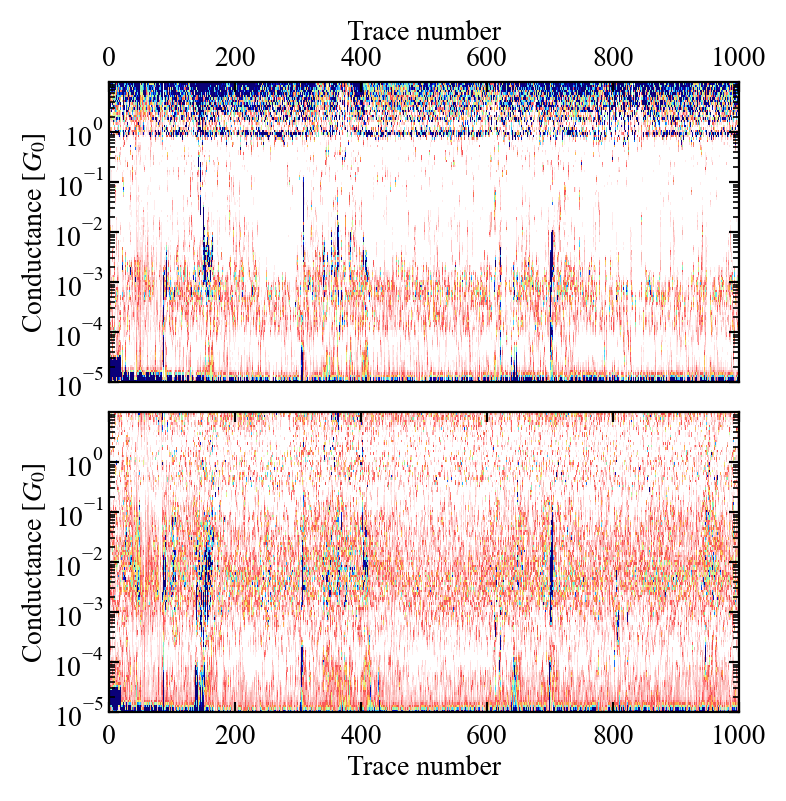

In [55]:
hist_bpy_4.plot_temporal_hist(dpi=200, vmax_pull=500, vmax_push=1000)

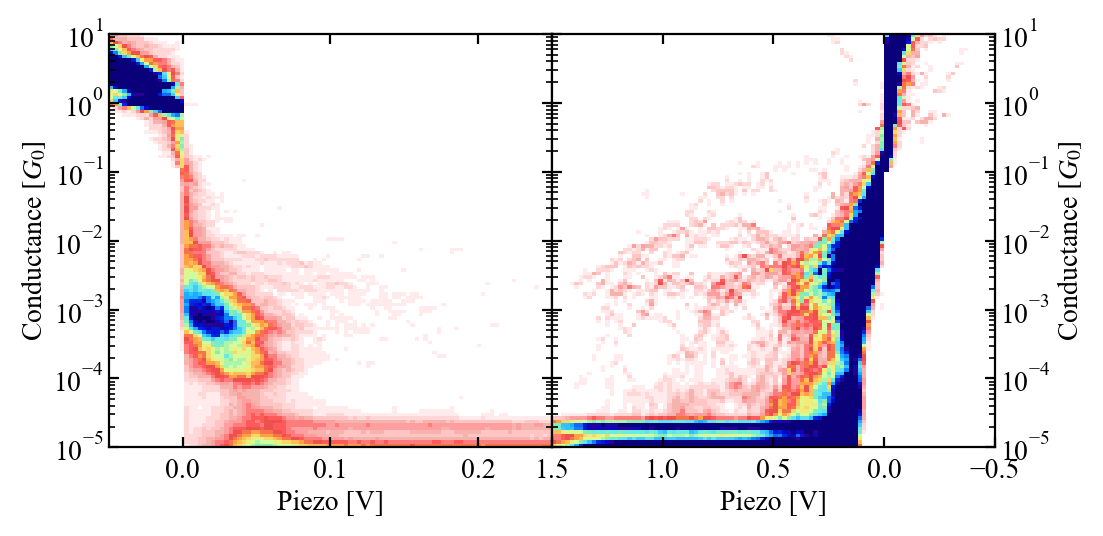

In [59]:
ax_pull, ax_push = hist_bpy_4.plot_hist_2d_both(dpi=200, vmax=6000)

# 2962-3169

In [60]:
hist_bpy_5 = Histogram(folder=home_folder,
                      start_trace = 2962, end_trace = 3169,
                      conductance_range=(1e-5, 10),
                      conductance_bins_num=20,
                      conductance_bins_mode='decade')

In [61]:
hist_bpy_5.calc_stats(align_at=0.1,
                     range_pull=(-0.05, 0.25),
                     range_push=(-0.5, 1.5))

  0%|          | 0/208 [00:00<?, ?it/s]

Pull 2D histogram created from 208 traces
Push 2D histogram created from 208 traces


(0.0, 800.0)

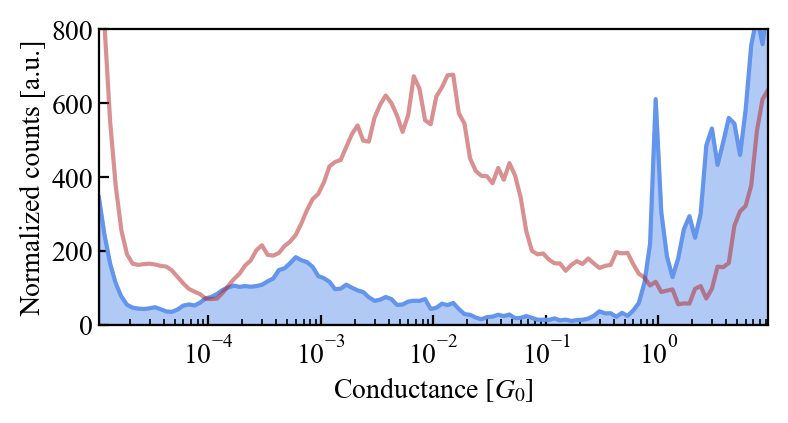

In [63]:
ax = hist_bpy_5.plot_hist_1d(dpi=200)
ax.set_ylim(0, 800)

(<AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Trace number', ylabel='Conductance $[G_{0}]$'>)

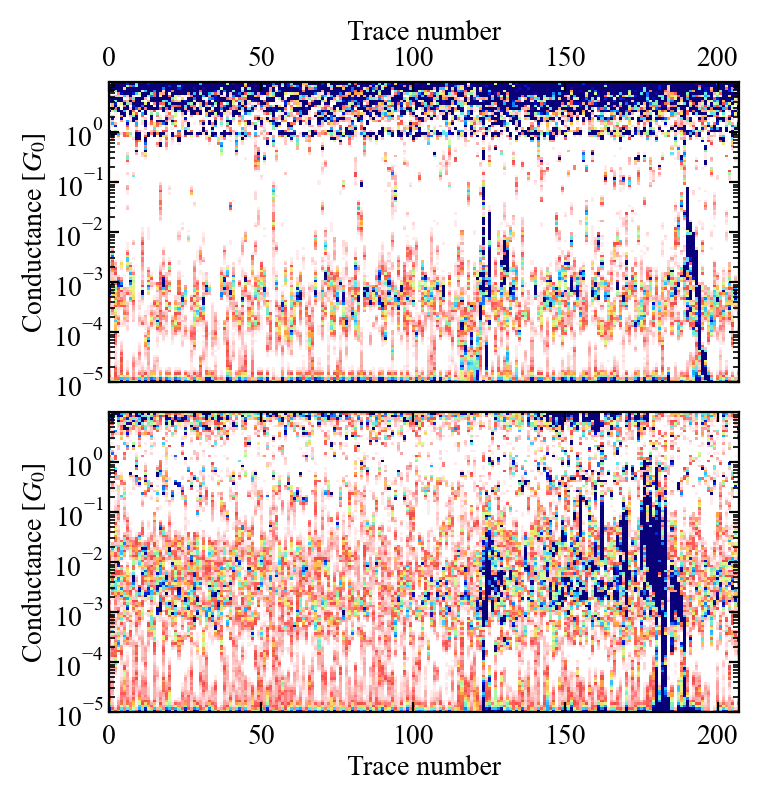

In [64]:
hist_bpy_5.plot_temporal_hist(dpi=200, vmax_pull=500, vmax_push=1000)

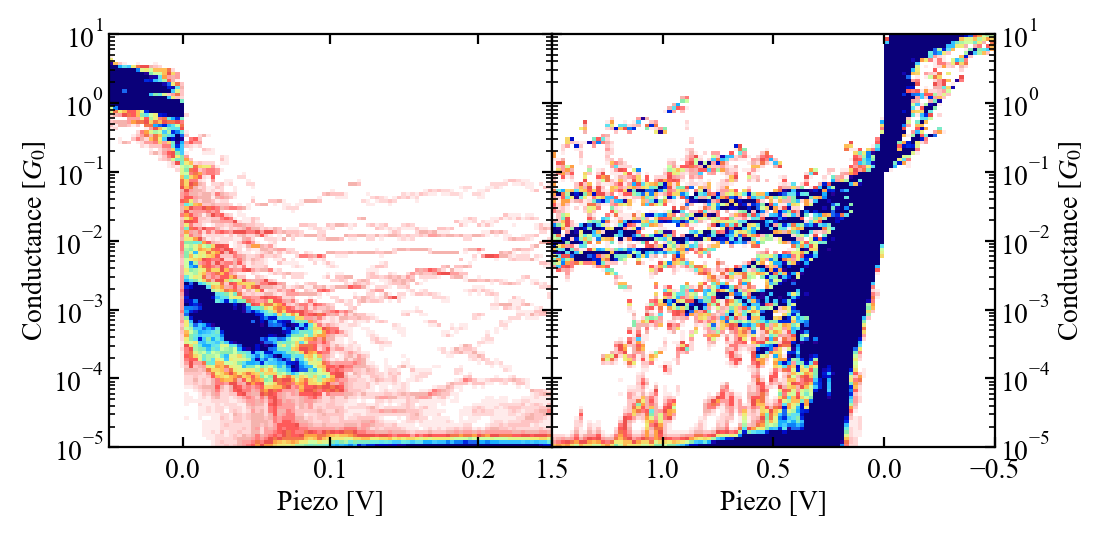

In [65]:
ax_pull, ax_push = hist_bpy_5.plot_hist_2d_both(dpi=200, vmax=1000)

# Hold measurements with constant 3s long bias plateau

In [110]:
hold_fast = np.arange(2503, 2656+1, 1)
hold_slow_1 = np.arange(2657, 2961+1, 1)
# hold_slow_2 = np.arange(3170, 3678+1, 1)  # There are no hold emasurements for these traces. Is this an error in the log?

In [121]:
# hold_stats_arr = np.zeros((len(hold_fast)+len(hold_slow_1)+len(hold_slow_2), 10))
hold_stats_arr = np.zeros((len(hold_fast)+len(hold_slow_1), 10))

delete_rows = []

# for i, which_trace in enumerate(np.concatenate((hold_fast, hold_slow_1, hold_slow_2))):
for i, which_trace in enumerate(tqdm(np.concatenate((hold_fast, hold_slow_1)))):

    trace_pair = TracePair(trace = which_trace, load_from=home_folder)
    try:
        hold_trace = HoldTrace(trace = which_trace, load_from=home_folder, bias_offset = 0,
                               r_serial_ohm = trace_pair.R_serial, sample_rate = trace_pair.sample_rate,
                               min_step_len = 140_000, min_height = 1, iv = None,
                               gain= 1e7)

        hold_stats_arr[i, 0] = trace_pair.trace_num
        hold_stats_arr[i, 1] = trace_pair.rate

        hold_stats_arr[i, 2] = trace_pair.hold_set_pull
        hold_stats_arr[i, 3] = trace_pair.hold_set_push
        hold_stats_arr[i, 4] = trace_pair.hold_conductance_pull
        hold_stats_arr[i, 5] = trace_pair.hold_conductance_push

        hold_stats_arr[i, 6] = hold_trace.G_hold_pull
        hold_stats_arr[i, 7] = hold_trace.G_hold_push
        hold_stats_arr[i, 8] = hold_trace.G_avg_pull
        hold_stats_arr[i, 9] = hold_trace.G_avg_push
    except (MeasurementNotComplete, KeyError):
        # print(which_trace)
        delete_rows.append(i)

print(f'{len(delete_rows)} row(s) deleted.')
hold_stats_arr = np.delete(hold_stats_arr, delete_rows, axis=0)

  0%|          | 0/459 [00:00<?, ?it/s]

D:\mcbj_stmbj\utils.py:183: RuntimeWarning: divide by zero encountered in reciprocal
  return 12900 * (bias_v / current - r_serial_ohm) ** (-1)


1 row(s) deleted.


In [122]:
hold_stats_arr

array([[2.50400000e+03, 1.00000000e+00, 2.00000000e-03, ...,
        2.85414571e-04, 5.21850416e-06, 5.55635081e-04],
       [2.50500000e+03, 1.00000000e+00, 2.00000000e-03, ...,
        6.42305473e-04, 2.72406382e-04, 3.78731289e-03],
       [2.50600000e+03, 1.00000000e+00, 2.00000000e-03, ...,
        4.20341268e-04, 6.11906398e-06, 2.21570507e-02],
       ...,
       [2.95900000e+03, 2.00000000e-01, 2.00000000e-03, ...,
        6.87052612e-04, 5.80787037e-06, 2.86213914e-03],
       [2.96000000e+03, 2.00000000e-01, 2.00000000e-03, ...,
        7.02936435e-04, 6.28215319e-04, 1.34308997e-03],
       [2.96100000e+03, 2.00000000e-01, 2.00000000e-03, ...,
        5.98938437e-04, 3.32244847e-04, 2.19058804e-03]])

In [150]:
hold_stats = pd.DataFrame(data=hold_stats_arr, columns=('trace', 'rate', 'set_pull', 'set_push', 'trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'))

In [151]:
hold_stats.head()

trace  rate  set_pull  set_push  trigger_pull  trigger_push  start_pull  \
0  2504.0   1.0     0.002    0.0005     34.545528      0.000571    0.000006   
1  2505.0   1.0     0.002    0.0005      0.000998      0.000749    0.001124   
2  2506.0   1.0     0.002    0.0005      0.001386      0.000516    0.000775   
3  2507.0   1.0     0.002    0.0005      0.001980      0.000924    0.000104   
4  2508.0   1.0     0.002    0.0005      0.000450      0.000515    0.000208   

   start_push  end_pull  end_push  
0    0.000285  0.000005  0.000556  
1    0.000642  0.000272  0.003787  
2    0.000420  0.000006  0.022157  
3    0.001512  0.000003  0.002160  
4    0.000496  0.000004  0.001477

In [152]:
hold_stats_log = hold_stats.copy()

cols = ['set_pull', 'set_push', 'trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push']

hold_stats_log[cols] = hold_stats_log[cols].transform(lambda x: np.log10(x))

In [153]:
hold_stats_log

trace  rate  set_pull  set_push  trigger_pull  trigger_push  start_pull  \
0    2504.0   1.0  -2.69897  -3.30103      1.538392     -3.243015   -5.245817   
1    2505.0   1.0  -2.69897  -3.30103     -3.000699     -3.125633   -2.949348   
2    2506.0   1.0  -2.69897  -3.30103     -2.858323     -3.287021   -3.110699   
3    2507.0   1.0  -2.69897  -3.30103     -2.703342     -3.034528   -3.981992   
4    2508.0   1.0  -2.69897  -3.30103     -3.346385     -3.288264   -3.682265   
..      ...   ...       ...       ...           ...           ...         ...   
453  2957.0   0.2  -2.69897  -3.30103     -2.703147     -3.068159   -2.641067   
454  2958.0   0.2  -2.69897  -3.30103     -2.626259     -3.252379   -2.786165   
455  2959.0   0.2  -2.69897  -3.30103     -3.073166     -3.270461   -3.069986   
456  2960.0   0.2  -2.69897  -3.30103     -2.673418     -3.162804   -2.620095   
457  2961.0   0.2  -2.69897  -3.30103     -2.738541     -3.313032   -2.284141   

     start_push  end_pull  end_push  
0     -3.544524 -5.282454 -3.255210  
1     -3.192258 -3.564783 -2.421669  
2     -3.376398 -5.213315 -1.654488  
3     -2.820464 -5.504874 -2.665495  
4     -3.304228 -5.408256 -2.830680  
..          ...       ...       ...  
453   -2.940171 -3.229603 -2.631947  
454   -3.085567 -3.622937 -2.946734  
455   -3.163010 -5.235983 -2.543309  
456   -3.153084 -3.201891 -2.871895  
457   -3.222618 -3.478542 -2.659439  

[458 rows x 10 columns]

In [98]:
import seaborn as sns

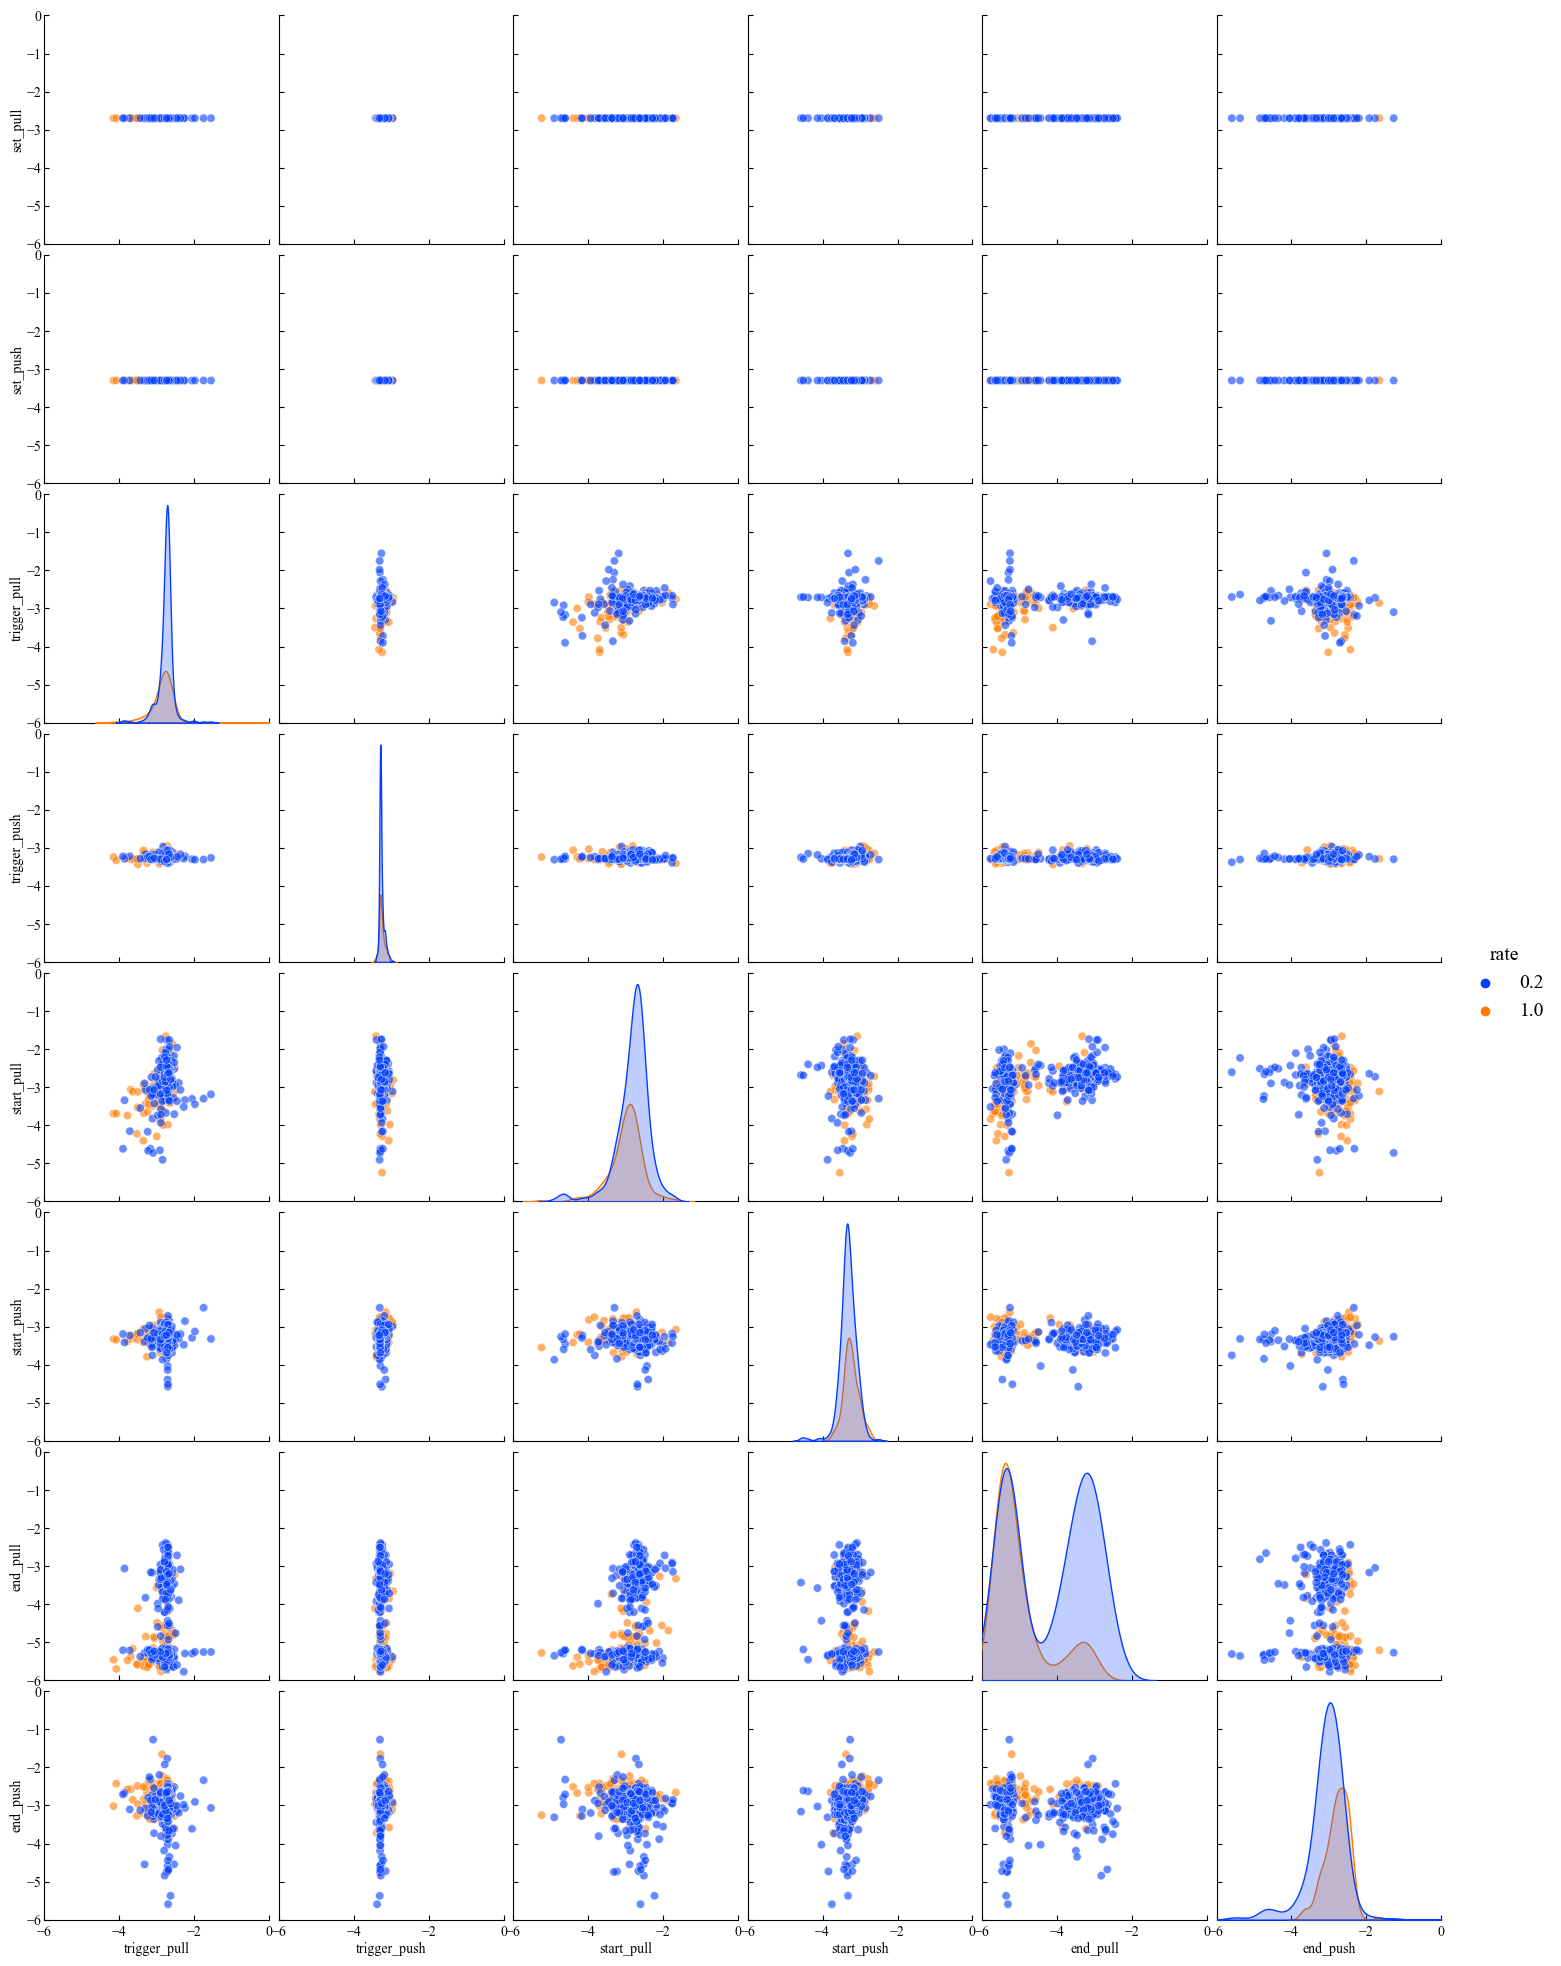

In [136]:
pp = sns.pairplot(data=hold_stats_log,
                  x_vars=('trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'),
                  y_vars=('set_pull', 'set_push', 'trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'),
                  hue='rate', palette='bright', plot_kws={'alpha': 0.6})

for ax in pp.axes.flat:
    ax.set_xlim(-6, 0)
    ax.set_ylim(-6, 0)

plt.show()

In [144]:
trace_pair = TracePair(trace = hold_fast[1], load_from=home_folder)
hold_1_did_not_break_pull, hold_1_did_not_break_push = filter_traces.filter_hold(home_folder,
                                                                                 filter_condition=filter_traces.does_not_break_array,
                                                                                 traces=hold_fast[1:],
                                                                                 bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                                                                                 min_step_len=140_000)
trace_pair = TracePair(trace = hold_slow_1[0], load_from=home_folder)
hold_2_did_not_break_pull, hold_2_did_not_break_push = filter_traces.filter_hold(home_folder,
                                                                                 filter_condition=filter_traces.does_not_break_array,
                                                                                 traces=hold_slow_1,
                                                                                 bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                                                                                 min_step_len=140_000)

  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/305 [00:00<?, ?it/s]

D:\mcbj_stmbj\utils.py:183: RuntimeWarning: divide by zero encountered in reciprocal
  return 12900 * (bias_v / current - r_serial_ohm) ** (-1)


In [158]:
hold_stats['did_not_break_pull'] = hold_stats['trace'].isin(hold_1_did_not_break_pull)
hold_stats['did_not_break_pull'] = hold_stats['trace'].isin(hold_2_did_not_break_pull)

hold_stats['did_not_break_push'] = hold_stats['trace'].isin(hold_1_did_not_break_push)
hold_stats['did_not_break_push'] = hold_stats['trace'].isin(hold_2_did_not_break_push)

hold_stats_log['did_not_break_pull'] = hold_stats_log['trace'].isin(hold_1_did_not_break_pull)
hold_stats_log['did_not_break_pull'] = hold_stats_log['trace'].isin(hold_2_did_not_break_pull)

hold_stats_log['did_not_break_push'] = hold_stats_log['trace'].isin(hold_1_did_not_break_push)
hold_stats_log['did_not_break_push'] = hold_stats_log['trace'].isin(hold_2_did_not_break_push)

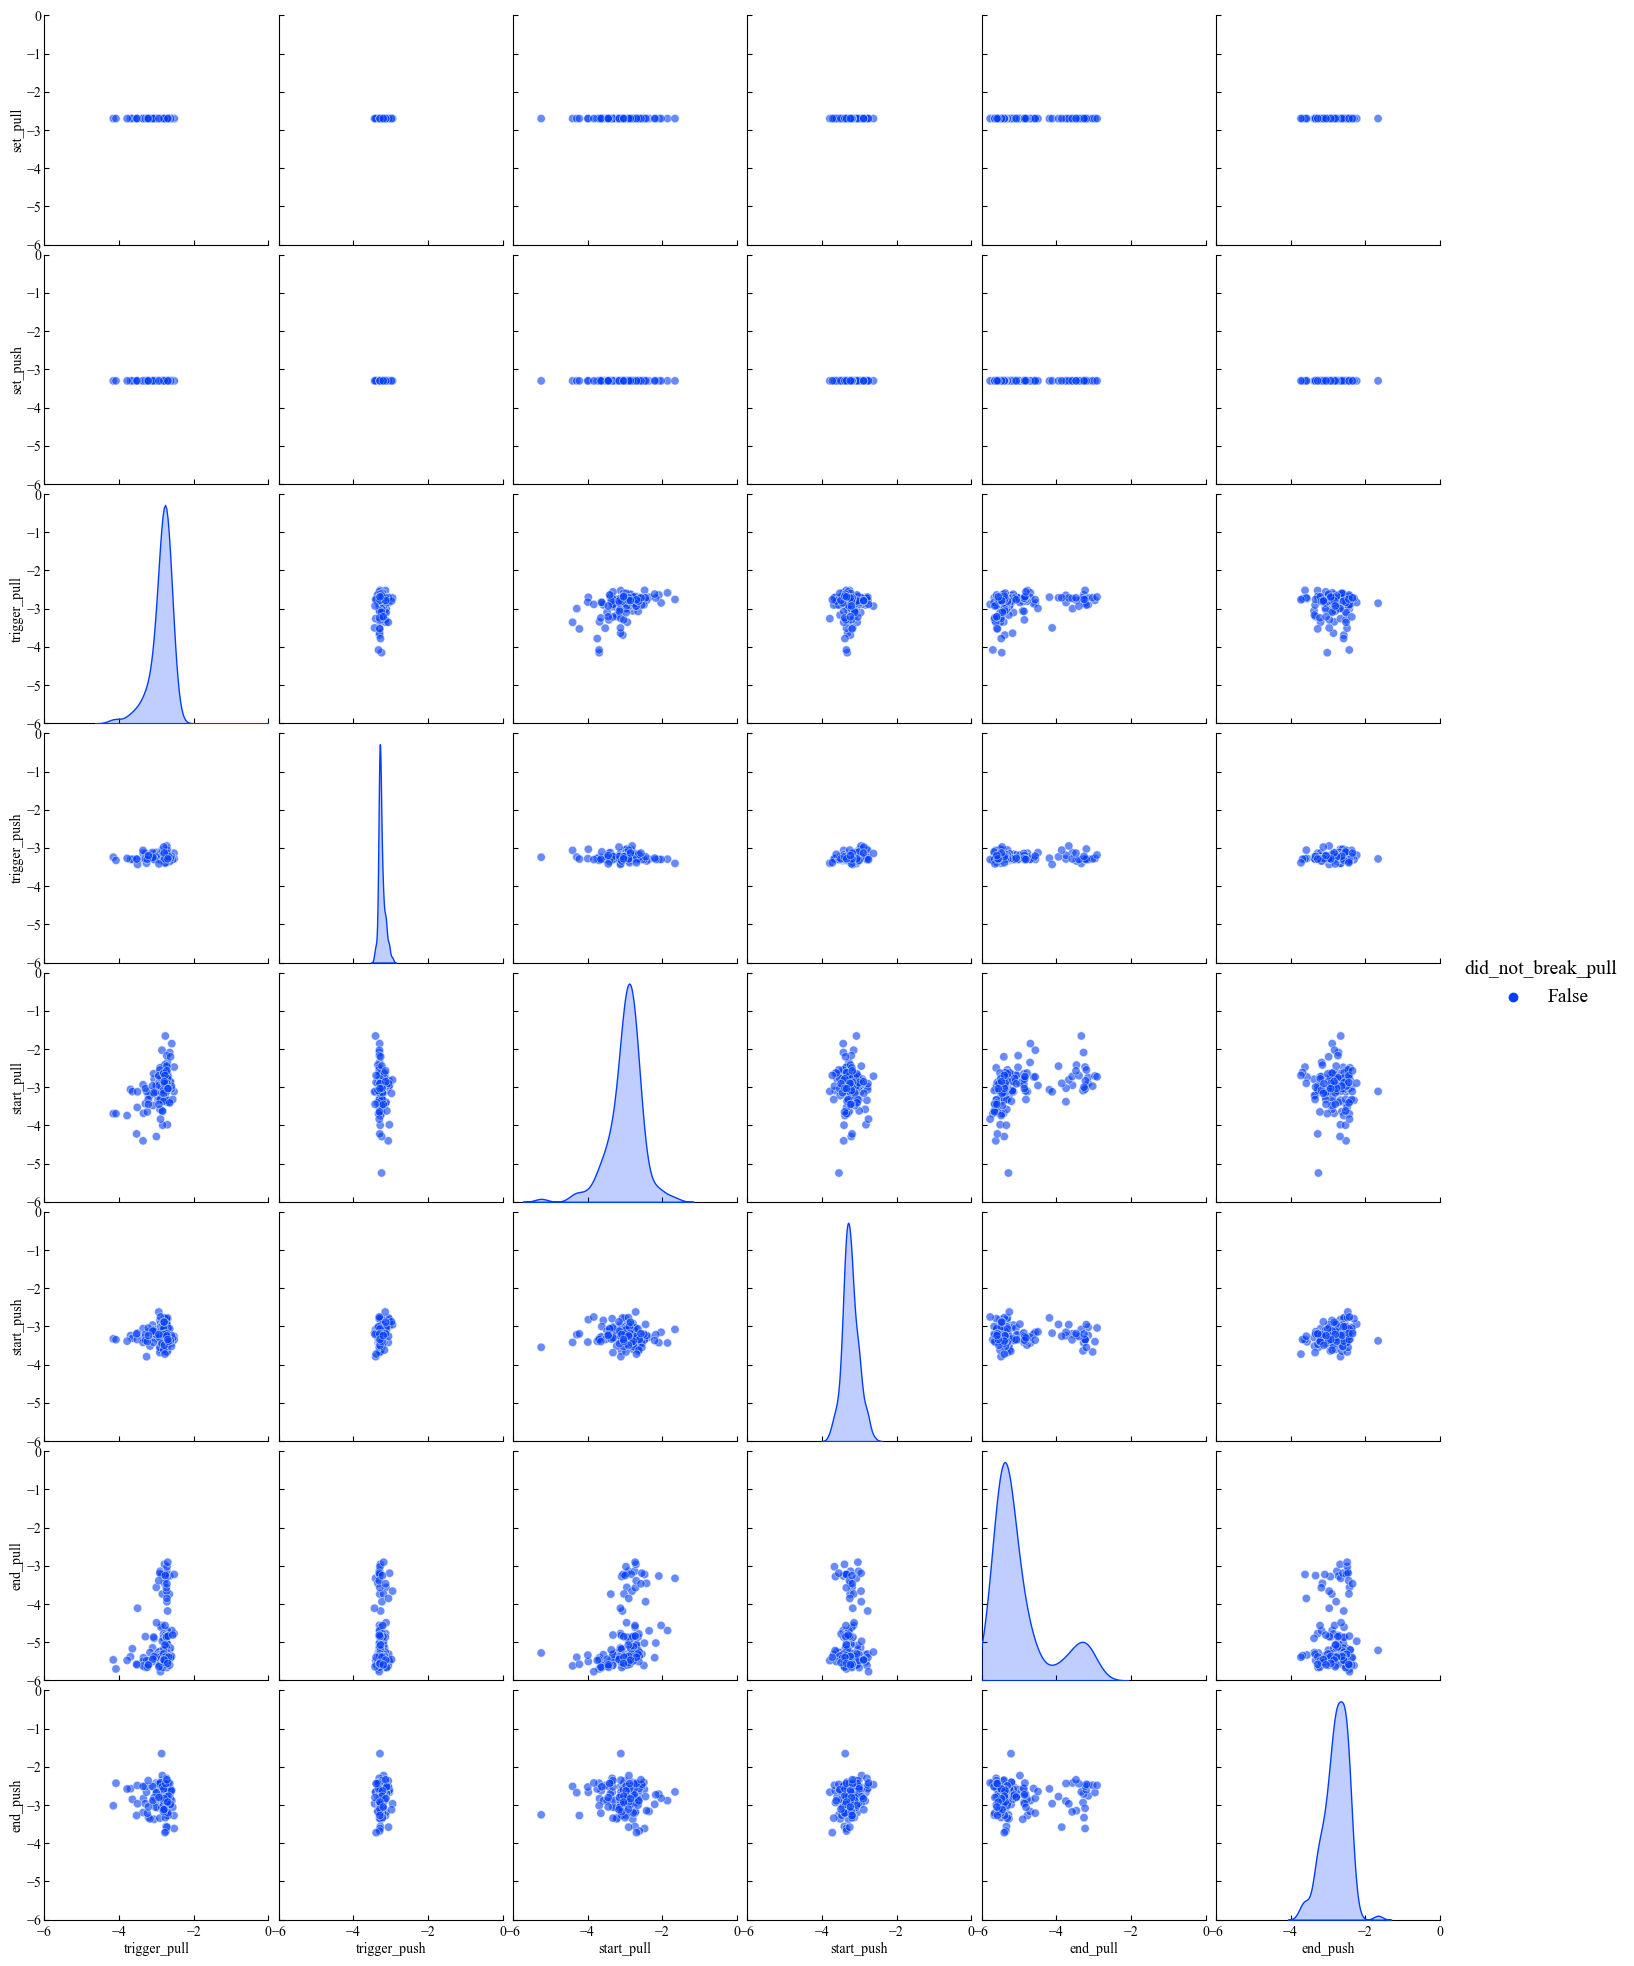

In [167]:
pp = sns.pairplot(data=hold_stats_log[hold_stats_log['rate'] == 1.0],
                  x_vars=('trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'),
                  y_vars=('set_pull', 'set_push', 'trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'),
                  hue='did_not_break_pull', palette='bright', plot_kws={'alpha': 0.6})

for ax in pp.axes.flat:
    ax.set_xlim(-6, 0)
    ax.set_ylim(-6, 0)

plt.show()

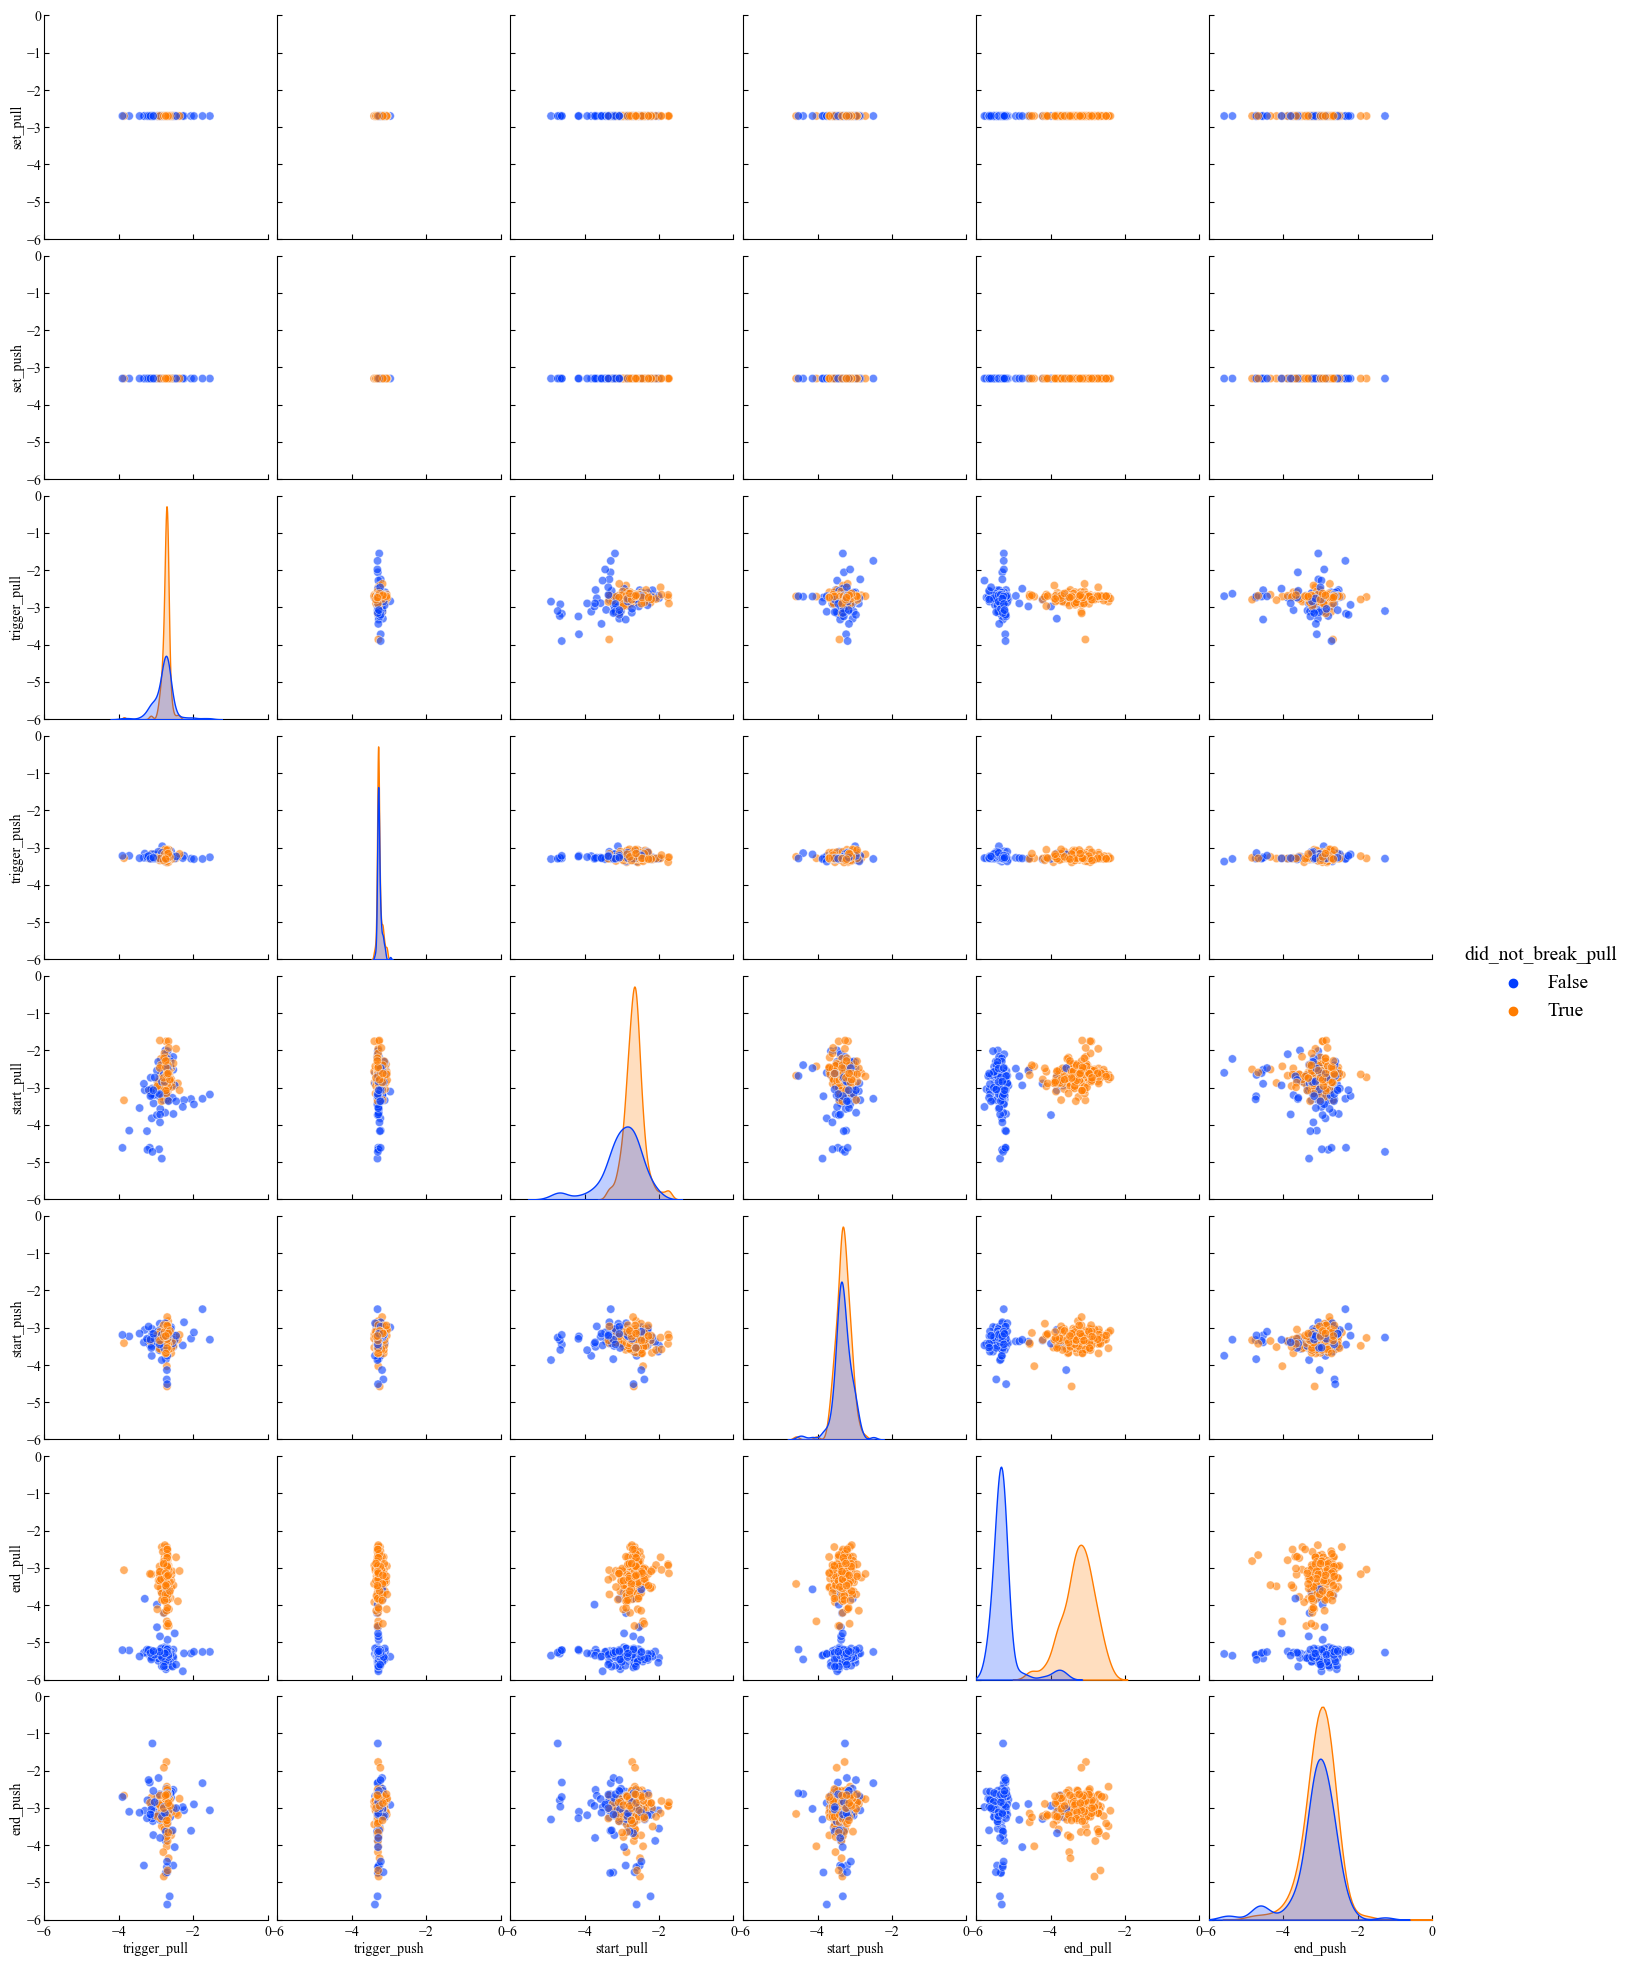

In [168]:
pp = sns.pairplot(data=hold_stats_log[hold_stats_log['rate'] == 0.2],
                  x_vars=('trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'),
                  y_vars=('set_pull', 'set_push', 'trigger_pull', 'trigger_push', 'start_pull', 'start_push', 'end_pull', 'end_push'),
                  hue='did_not_break_pull', palette='bright', plot_kws={'alpha': 0.6})

for ax in pp.axes.flat:
    ax.set_xlim(-6, 0)
    ax.set_ylim(-6, 0)

plt.show()

In [166]:
hold_stats_log[hold_stats_log['rate'] == 0.2]['did_not_break_pull'].value_counts()

True     172
False    133
Name: did_not_break_pull, dtype: int64

# I(V) measurements

## Details

**bias waveform**: *????.ini*

**IV bias range**: $\pm 1\;\text{V}$

## 3701-4702

In [172]:
iv_1 = np.arange(3701, 4702+1, 1)

total_num = 4702-3701
print(total_num)

1001


### Filtering traces that did not break during the hold measurement

In [173]:
trace_pair = TracePair(trace = iv_1[0], load_from=home_folder)

did_not_break_pull, did_not_break_push = filter_traces.filter_hold(home_folder,
                                                                   filter_condition=filter_traces.does_not_break_array,
                                                                   start_trace=3701, end_trace=4702,
                                                                   bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                                                                   min_step_len=20_000)

# with open(home_folder.joinpath('results/did_not_break_pull.npy'), 'wb') as f:
#     np.save(f, did_not_break_pull)
    
# with open(home_folder.joinpath('results/did_not_break_push.npy'), 'wb') as f:
#     np.save(f, did_not_break_push)

  0%|          | 0/1002 [00:00<?, ?it/s]

In [4]:
# with open(home_folder.joinpath('results/did_not_break_pull.npy'), 'rb') as f:
#     did_not_break_pull = np.load(f)
    
# with open(home_folder.joinpath('results/did_not_break_push.npy'), 'rb') as f:
#     did_not_break_push = np.load(f)

In [174]:
print(f'pull: {len(did_not_break_pull)}, {len(did_not_break_pull)/total_num*100}%')
print(f'push: {len(did_not_break_push)}, {len(did_not_break_push)/total_num*100}%')

pull: 882, 88.11188811188812%
push: 1002, 100.09990009990011%


0.6721281503044343


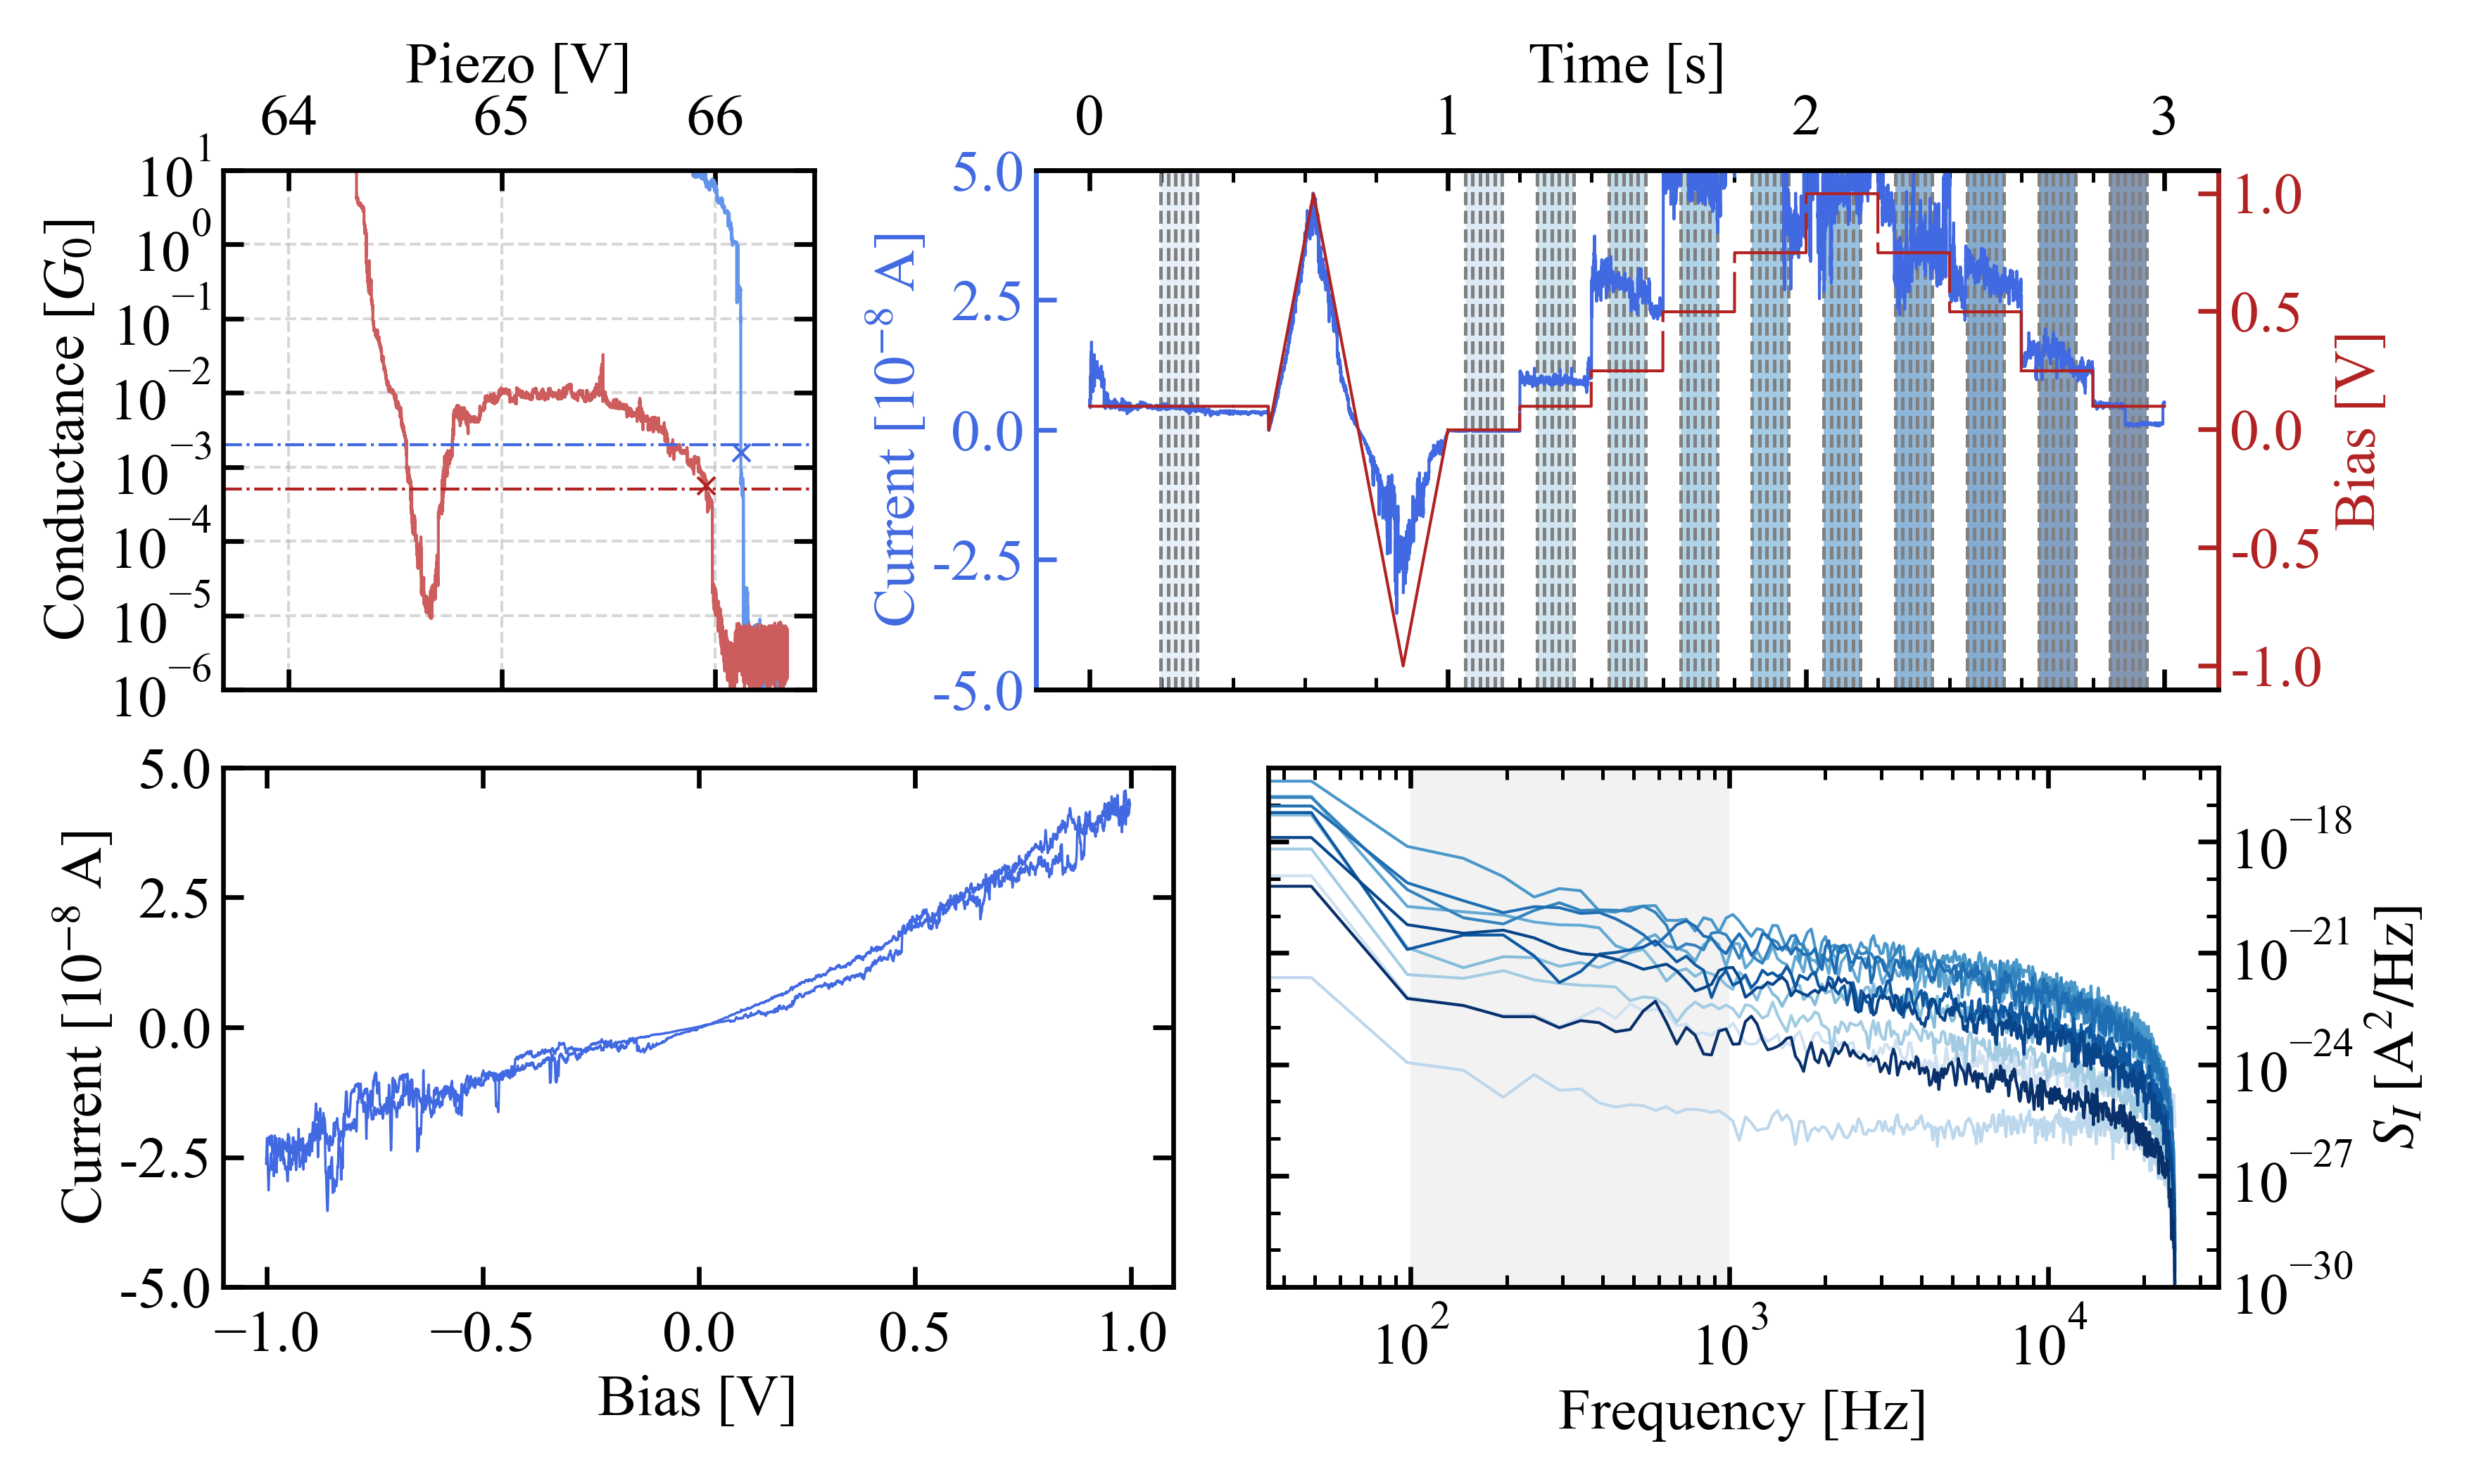

In [214]:
which_trace = did_not_break_pull[0]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=trace_pair.R_serial, min_step_len=8000, min_height=1, iv=0)


trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)
selected_colors_pull = colormaps['Blues'](np.linspace(0.2, 1, hold_trace.bias_steps.shape[0]))
selected_colors_push = colormaps['Reds'](np.linspace(0.2, 1, hold_trace.bias_steps.shape[0]))

plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='pull', smoothing=10, color_list=selected_colors_pull)

print(filter_traces.iv_difference(hold_trace, direction='pull', smoothing=100))

### Filtering traces where the conductance on the two 200 mV bias plateaus do not differ more than a factor of 2

In [209]:
trace_pair = TracePair(trace = did_not_break_pull[0], load_from=home_folder)

stable_pull, _ = filter_traces.filter_hold(home_folder, filter_condition=filter_traces.conductances_close,
                                           traces=did_not_break_pull,
                                           bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                                           min_step_len=8000, max_ratio=2, plateaus=(0, 2))

trace_pair = TracePair(trace = did_not_break_push[0], load_from=home_folder)

_, stable_push = filter_traces.filter_hold(home_folder, filter_condition=filter_traces.conductances_close,
                                           traces=did_not_break_push,
                                           bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                                           min_step_len=8000, max_ratio=2, plateaus=(0, 2))

# with open(home_folder.joinpath('results/stable_pull.npy'), 'wb') as f:
#     np.save(f, stable_pull)
    
# with open(home_folder.joinpath('results/stable_push.npy'), 'wb') as f:
#     np.save(f, stable_push)

  0%|          | 0/882 [00:00<?, ?it/s]

  0%|          | 0/1002 [00:00<?, ?it/s]

In [7]:
# with open(home_folder.joinpath('results/stable_pull.npy'), 'rb') as f:
#     stable_pull = np.load(f)
    
# with open(home_folder.joinpath('results/stable_push.npy'), 'rb') as f:
#     stable_push = np.load(f)

In [211]:
print(f'pull: {len(stable_pull)}, {len(stable_pull)/total_num*100}%')
print(f'push: {len(stable_push)}, {len(stable_push)/total_num*100}%')

pull: 351, 35.064935064935064%
push: 993, 99.20079920079921%


We are interested in the I(V) curves where the up-down sweeps overlap nicely. The difference between the up-down sweeps is calculated with the function `filter_traces.iv_difference`

### Filtering traces where the up-down I(V) sweeps overlap

0.6721281503044343


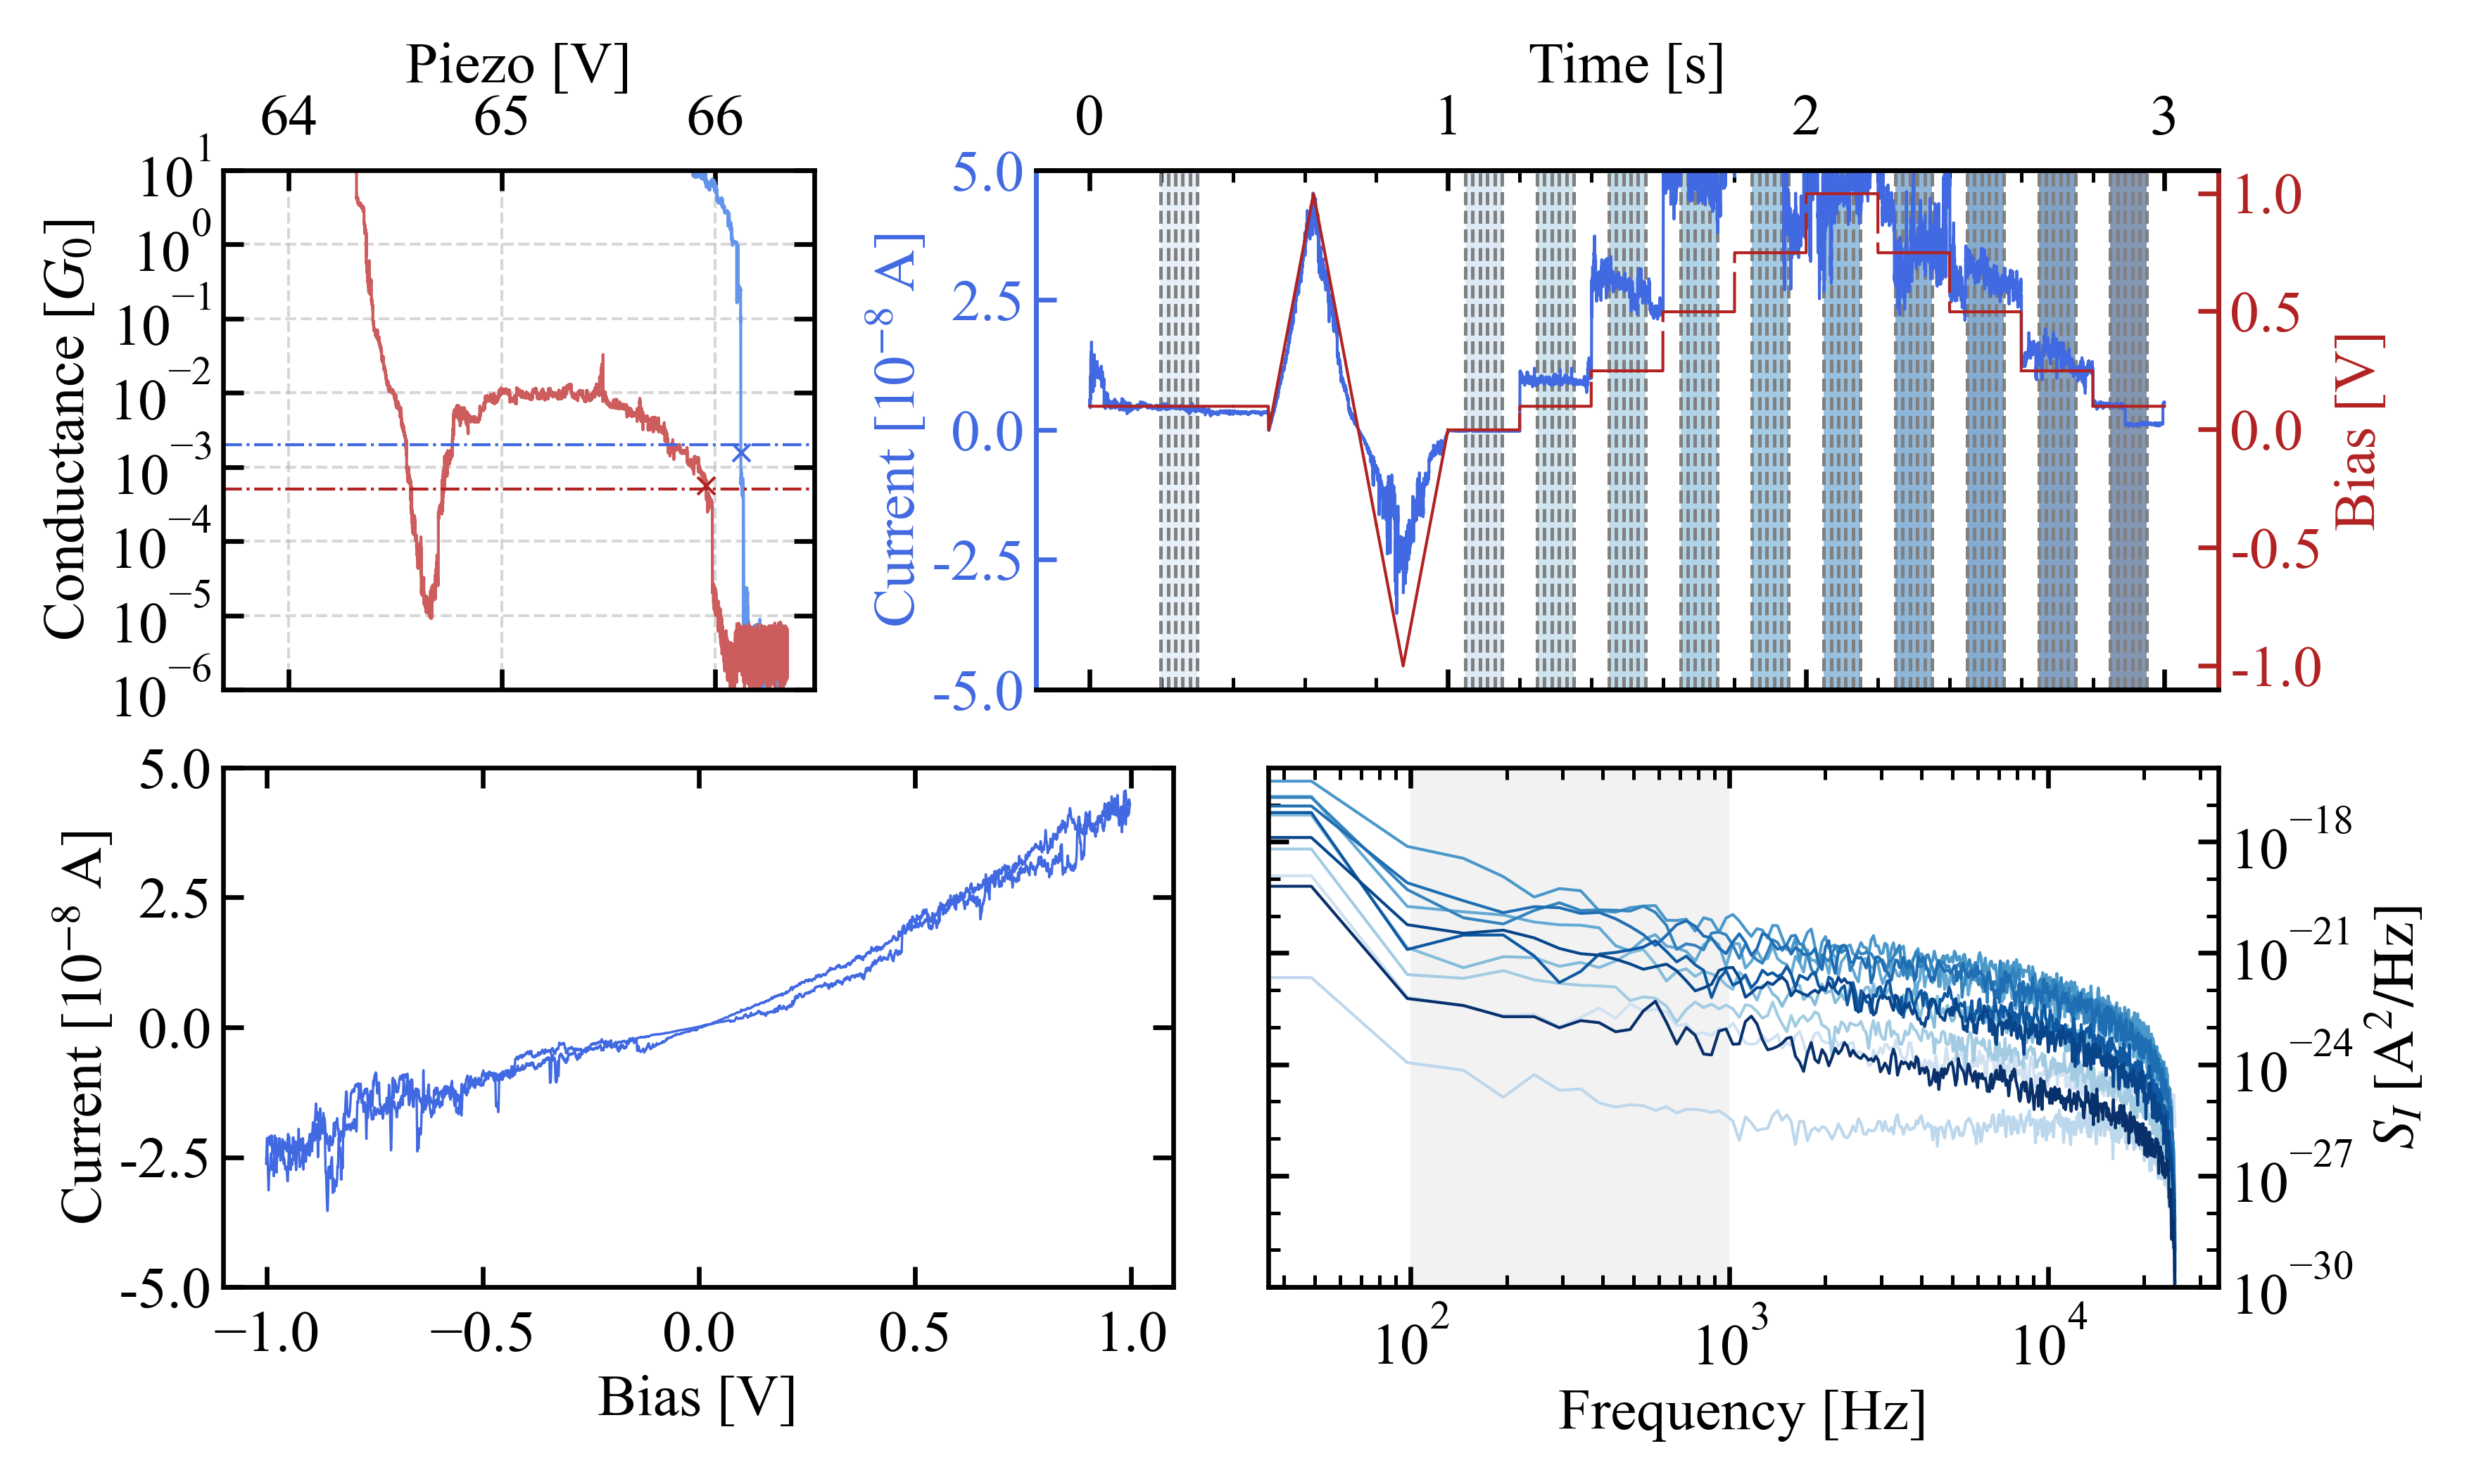

In [218]:
which_trace = stable_pull[0]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=trace_pair.R_serial, min_step_len=8000, min_height=1, iv=0)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)

selected_colors_pull = colormaps['Blues'](np.linspace(0.2, 1, hold_trace.bias_steps.shape[0]))
selected_colors_push = colormaps['Reds'](np.linspace(0.2, 1, hold_trace.bias_steps.shape[0]))

plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='pull',
                         smoothing=10, color_list=selected_colors_pull)

print(filter_traces.iv_difference(hold_trace, direction='pull', smoothing=100))

0.685483528701804


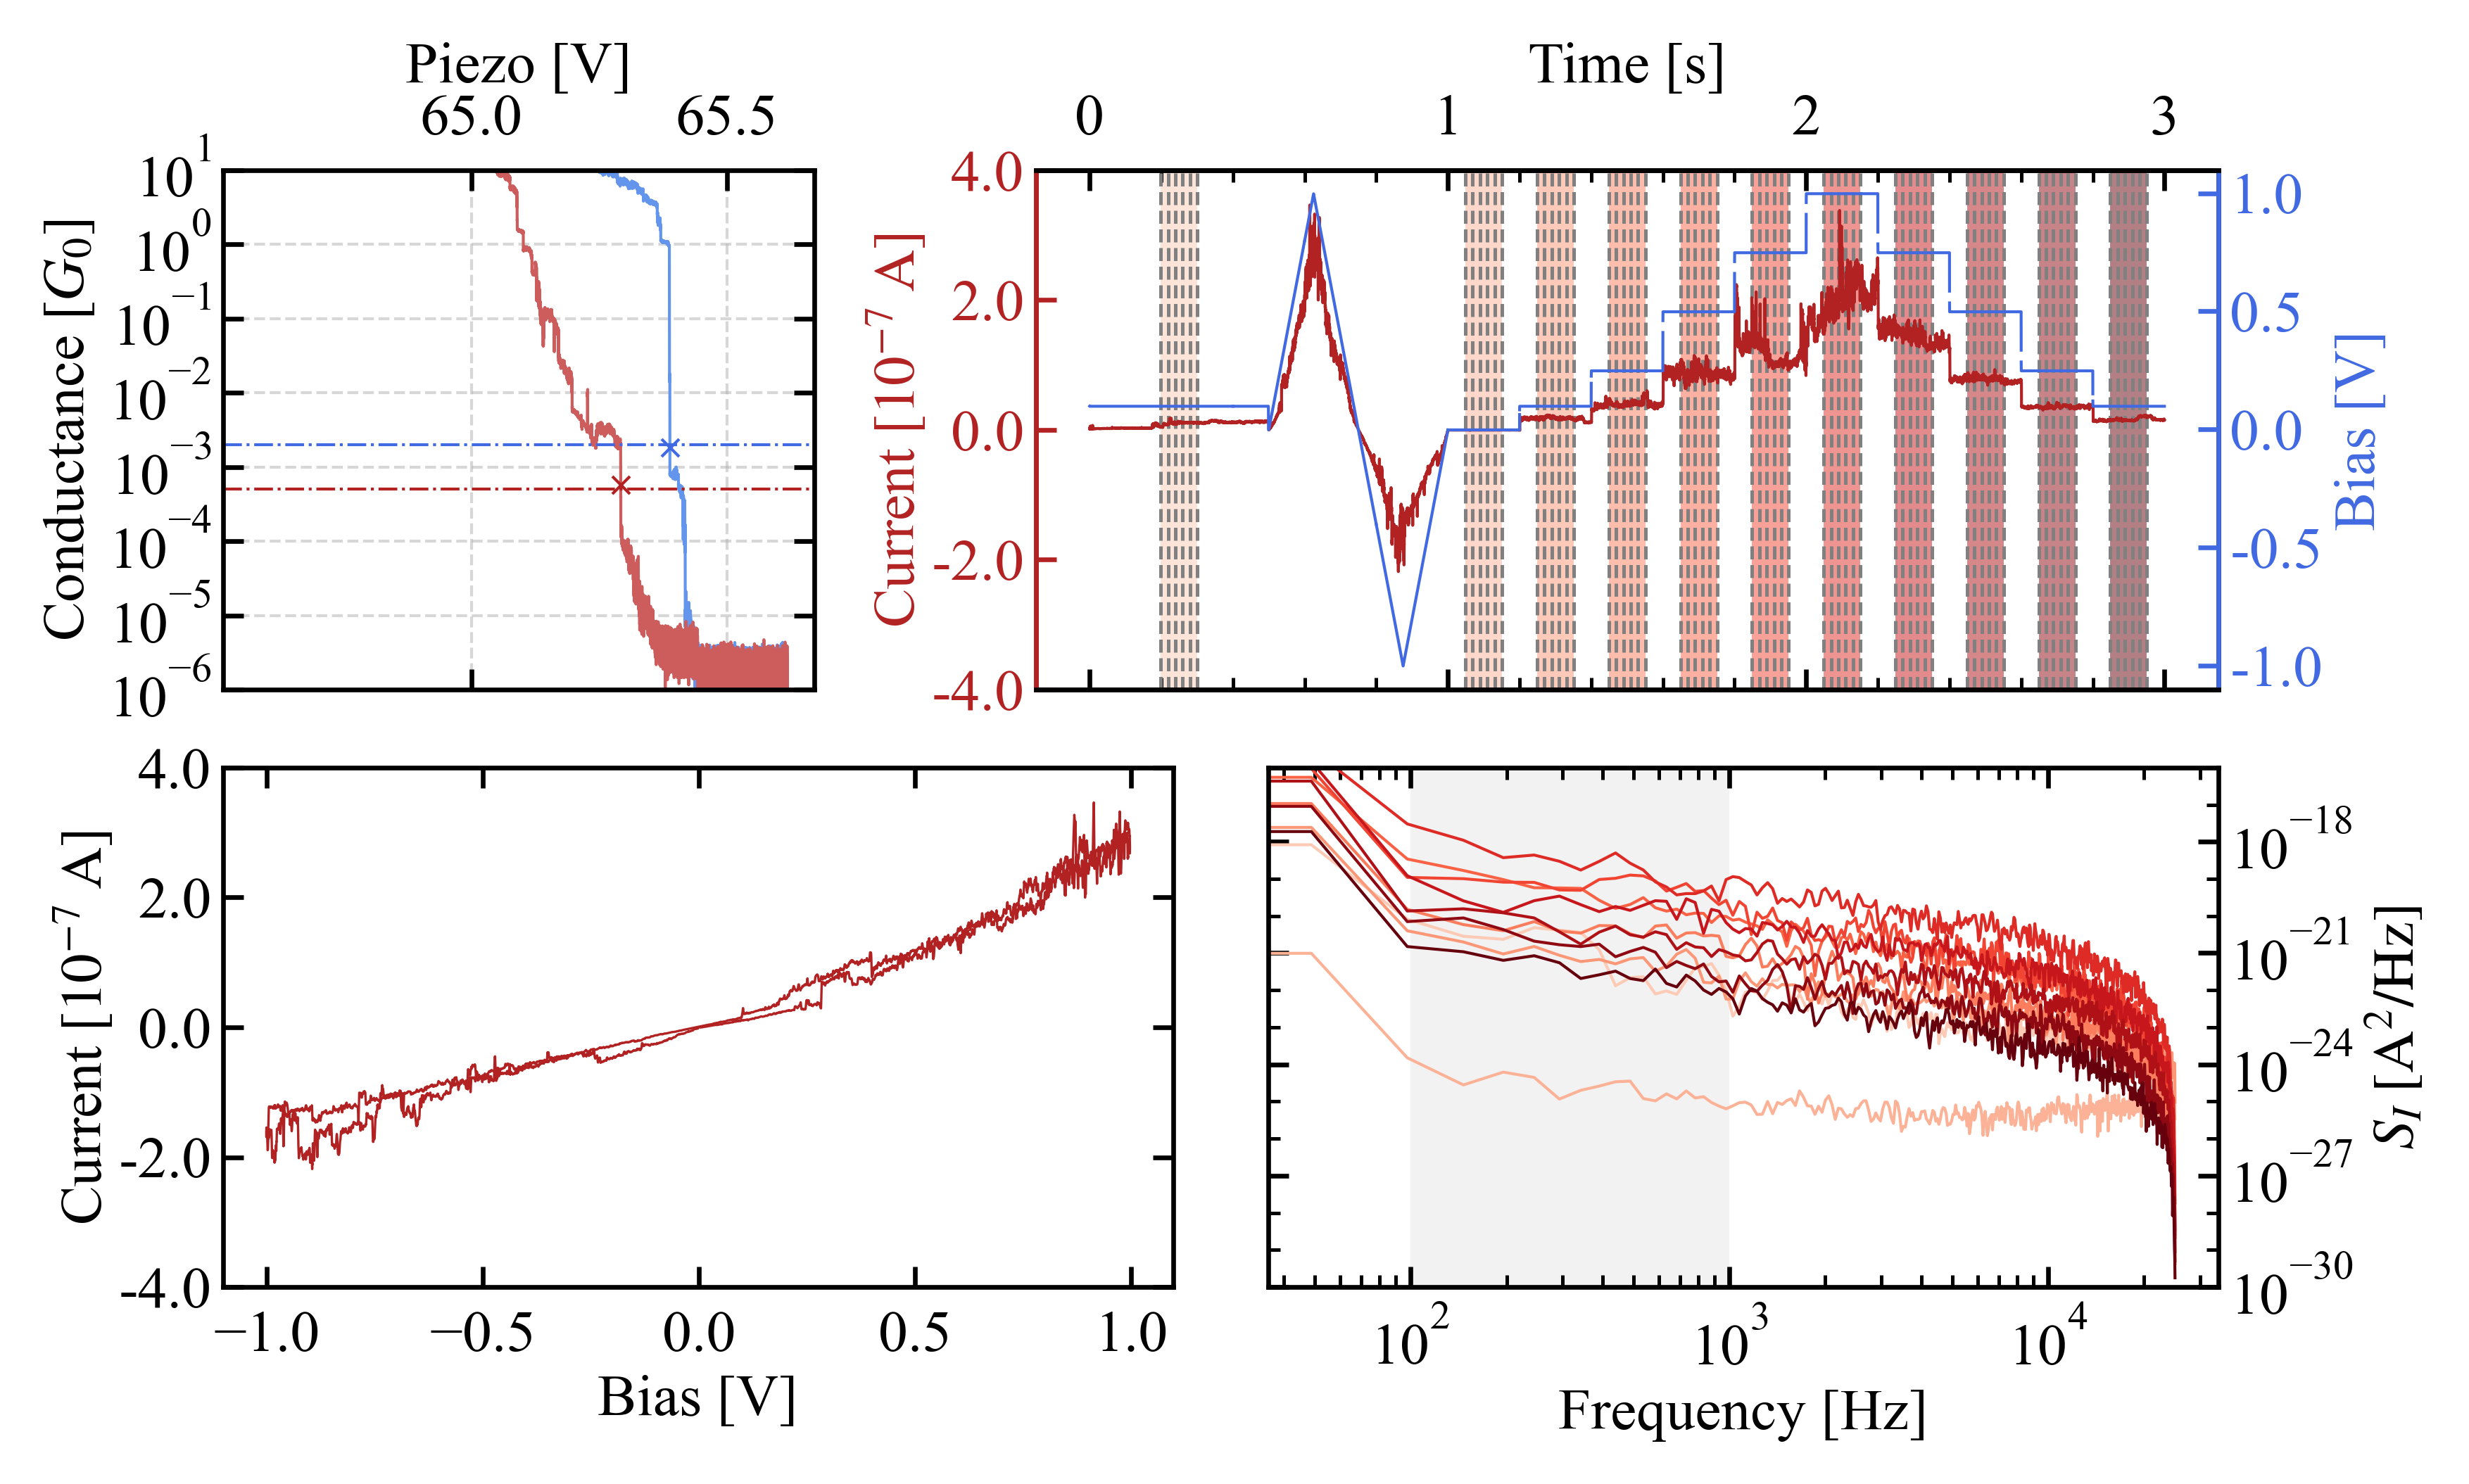

In [217]:
which_trace = stable_push[5]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=trace_pair.R_serial, min_step_len=8000, min_height=1, iv=0)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)

selected_colors_pull = colormaps['Blues'](np.linspace(0.2, 1, hold_trace.bias_steps.shape[0]))
selected_colors_push = colormaps['Reds'](np.linspace(0.2, 1, hold_trace.bias_steps.shape[0]))

plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='push',
                         smoothing=10, color_list=selected_colors_push)

print(filter_traces.iv_difference(hold_trace, direction='push', smoothing=100))

In [221]:
def get_iv_diff(trace: int, direction: str):
    try:
        hold_trace = HoldTrace(trace, load_from=home_folder, bias_offset=0,
                               r_serial_ohm=trace_pair.R_serial, min_step_len=8000, min_height=1, iv=0)
        # push_diff.append(filter_traces.iv_difference(hold_trace, direction='push', smoothing=100))
        # traces.append(hold_trace.trace_num)
        return filter_traces.iv_difference(hold_trace, direction=direction, smoothing=100)
    except MeasurementOverflow:
        return -1

In [222]:
push_diff = np.array(list(map(get_iv_diff, stable_push, ['push']*len(stable_push))))

D:\mcbj_stmbj\mcbj.py:2432: MeasurementOverflow: Current overflow during I(V) cycle, in push direction.
  warnings.warn('Current overflow during I(V) cycle, in push direction.', MeasurementOverflow)
D:\mcbj_stmbj\mcbj.py:2429: MeasurementOverflow: Current overflow during I(V) cycle, in pull direction.
  warnings.warn('Current overflow during I(V) cycle, in pull direction.', MeasurementOverflow)


In [223]:
pull_diff = np.array(list(map(get_iv_diff, stable_pull, ['pull']*len(stable_pull))))

108 10.876132930513595


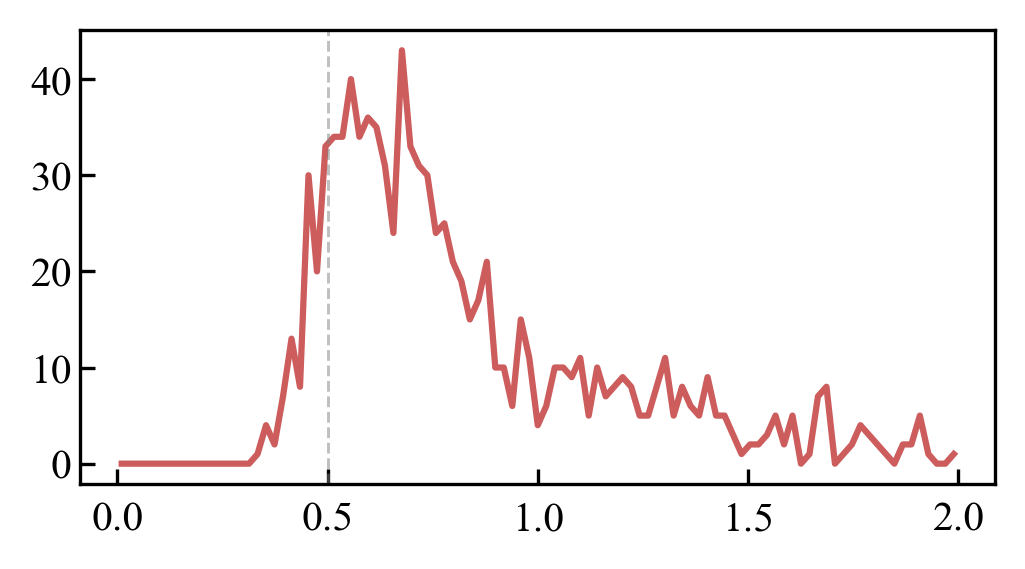

In [224]:
push_diff_bins, push_diff_hist = utils.calc_hist_1d_single(data=push_diff, xrange=(0, 2),
                                                           xbins_num=100, log_scale=False)

print(len(push_diff[push_diff < 0.5]), len(push_diff[push_diff < 0.5])/len(push_diff)*100)

fig, ax = plt.subplots(1, figsize=utils.cm2inch(10, 5), dpi=300)
ax.plot(push_diff_bins, push_diff_hist, 'indianred')
ax.axvline(0.5, c='grey', alpha=0.5, ls='--', lw=0.7)

36 10.256410256410255


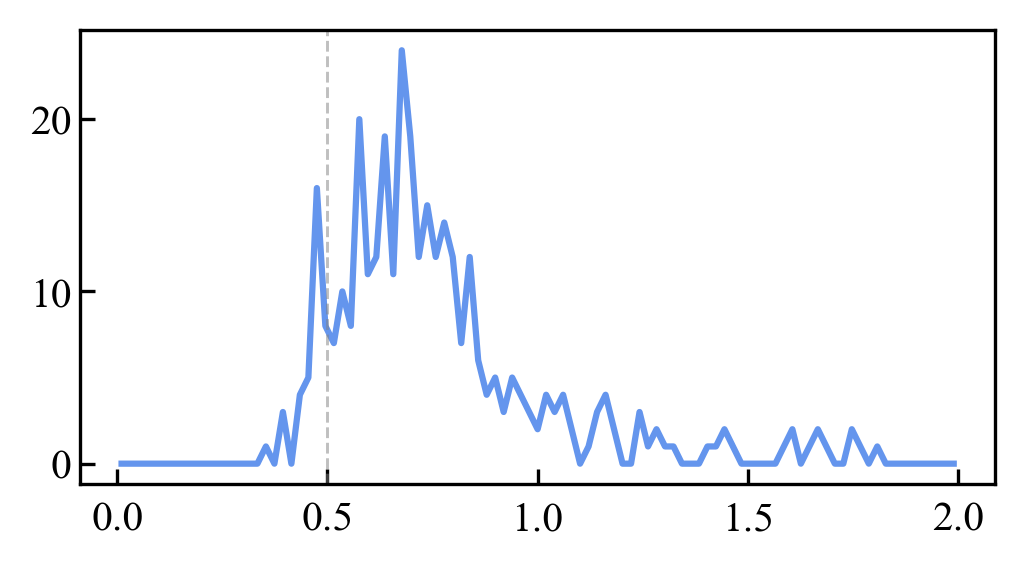

In [225]:
pull_diff_bins, pull_diff_hist = utils.calc_hist_1d_single(data=pull_diff, xrange=(0, 2),
                                                           xbins_num=100, log_scale=False)

print(len(pull_diff[pull_diff < 0.5]), len(pull_diff[pull_diff < 0.5])/len(pull_diff)*100)

fig, ax = plt.subplots(1, figsize=utils.cm2inch(10, 5), dpi=300)
ax.plot(pull_diff_bins, pull_diff_hist, 'cornflowerblue')
ax.axvline(0.5, c='grey', alpha=0.5, ls='--', lw=0.7)

In [227]:
iv_good_push = stable_push[np.where(np.logical_and(push_diff > 0, push_diff < 0.5))[0]]
iv_good_pull = stable_pull[np.where(np.logical_and(pull_diff > 0, pull_diff < 0.5))[0]]

# with open(home_folder.joinpath('results/iv_good_pull.npy'), 'wb') as f:
#     np.save(f, iv_good_pull)
    
# with open(home_folder.joinpath('results/iv_good_push.npy'), 'wb') as f:
#     np.save(f, iv_good_push)

In [13]:
# with open(home_folder.joinpath('results/iv_good_pull.npy'), 'rb') as f:
#     iv_good_pull = np.load(f)
    
# with open(home_folder.joinpath('results/iv_good_push.npy'), 'rb') as f:
#     iv_good_push = np.load(f)

In [228]:
print(f'pull: {len(iv_good_pull)}, {len(iv_good_pull)/total_num*100}%')
print(f'push: {len(iv_good_push)}, {len(iv_good_push)/total_num*100}%')

pull: 36, 3.5964035964035967%
push: 108, 10.789210789210788%


In [229]:
iv_good_pull

array([3708, 3713, 3721, 3741, 3791, 3827, 3896, 3956, 3961, 3972, 4012,
       4049, 4058, 4075, 4079, 4152, 4155, 4160, 4169, 4202, 4207, 4215,
       4217, 4220, 4240, 4344, 4460, 4589, 4592, 4608, 4626, 4642, 4647,
       4653, 4686, 4693])

0.474349788912681


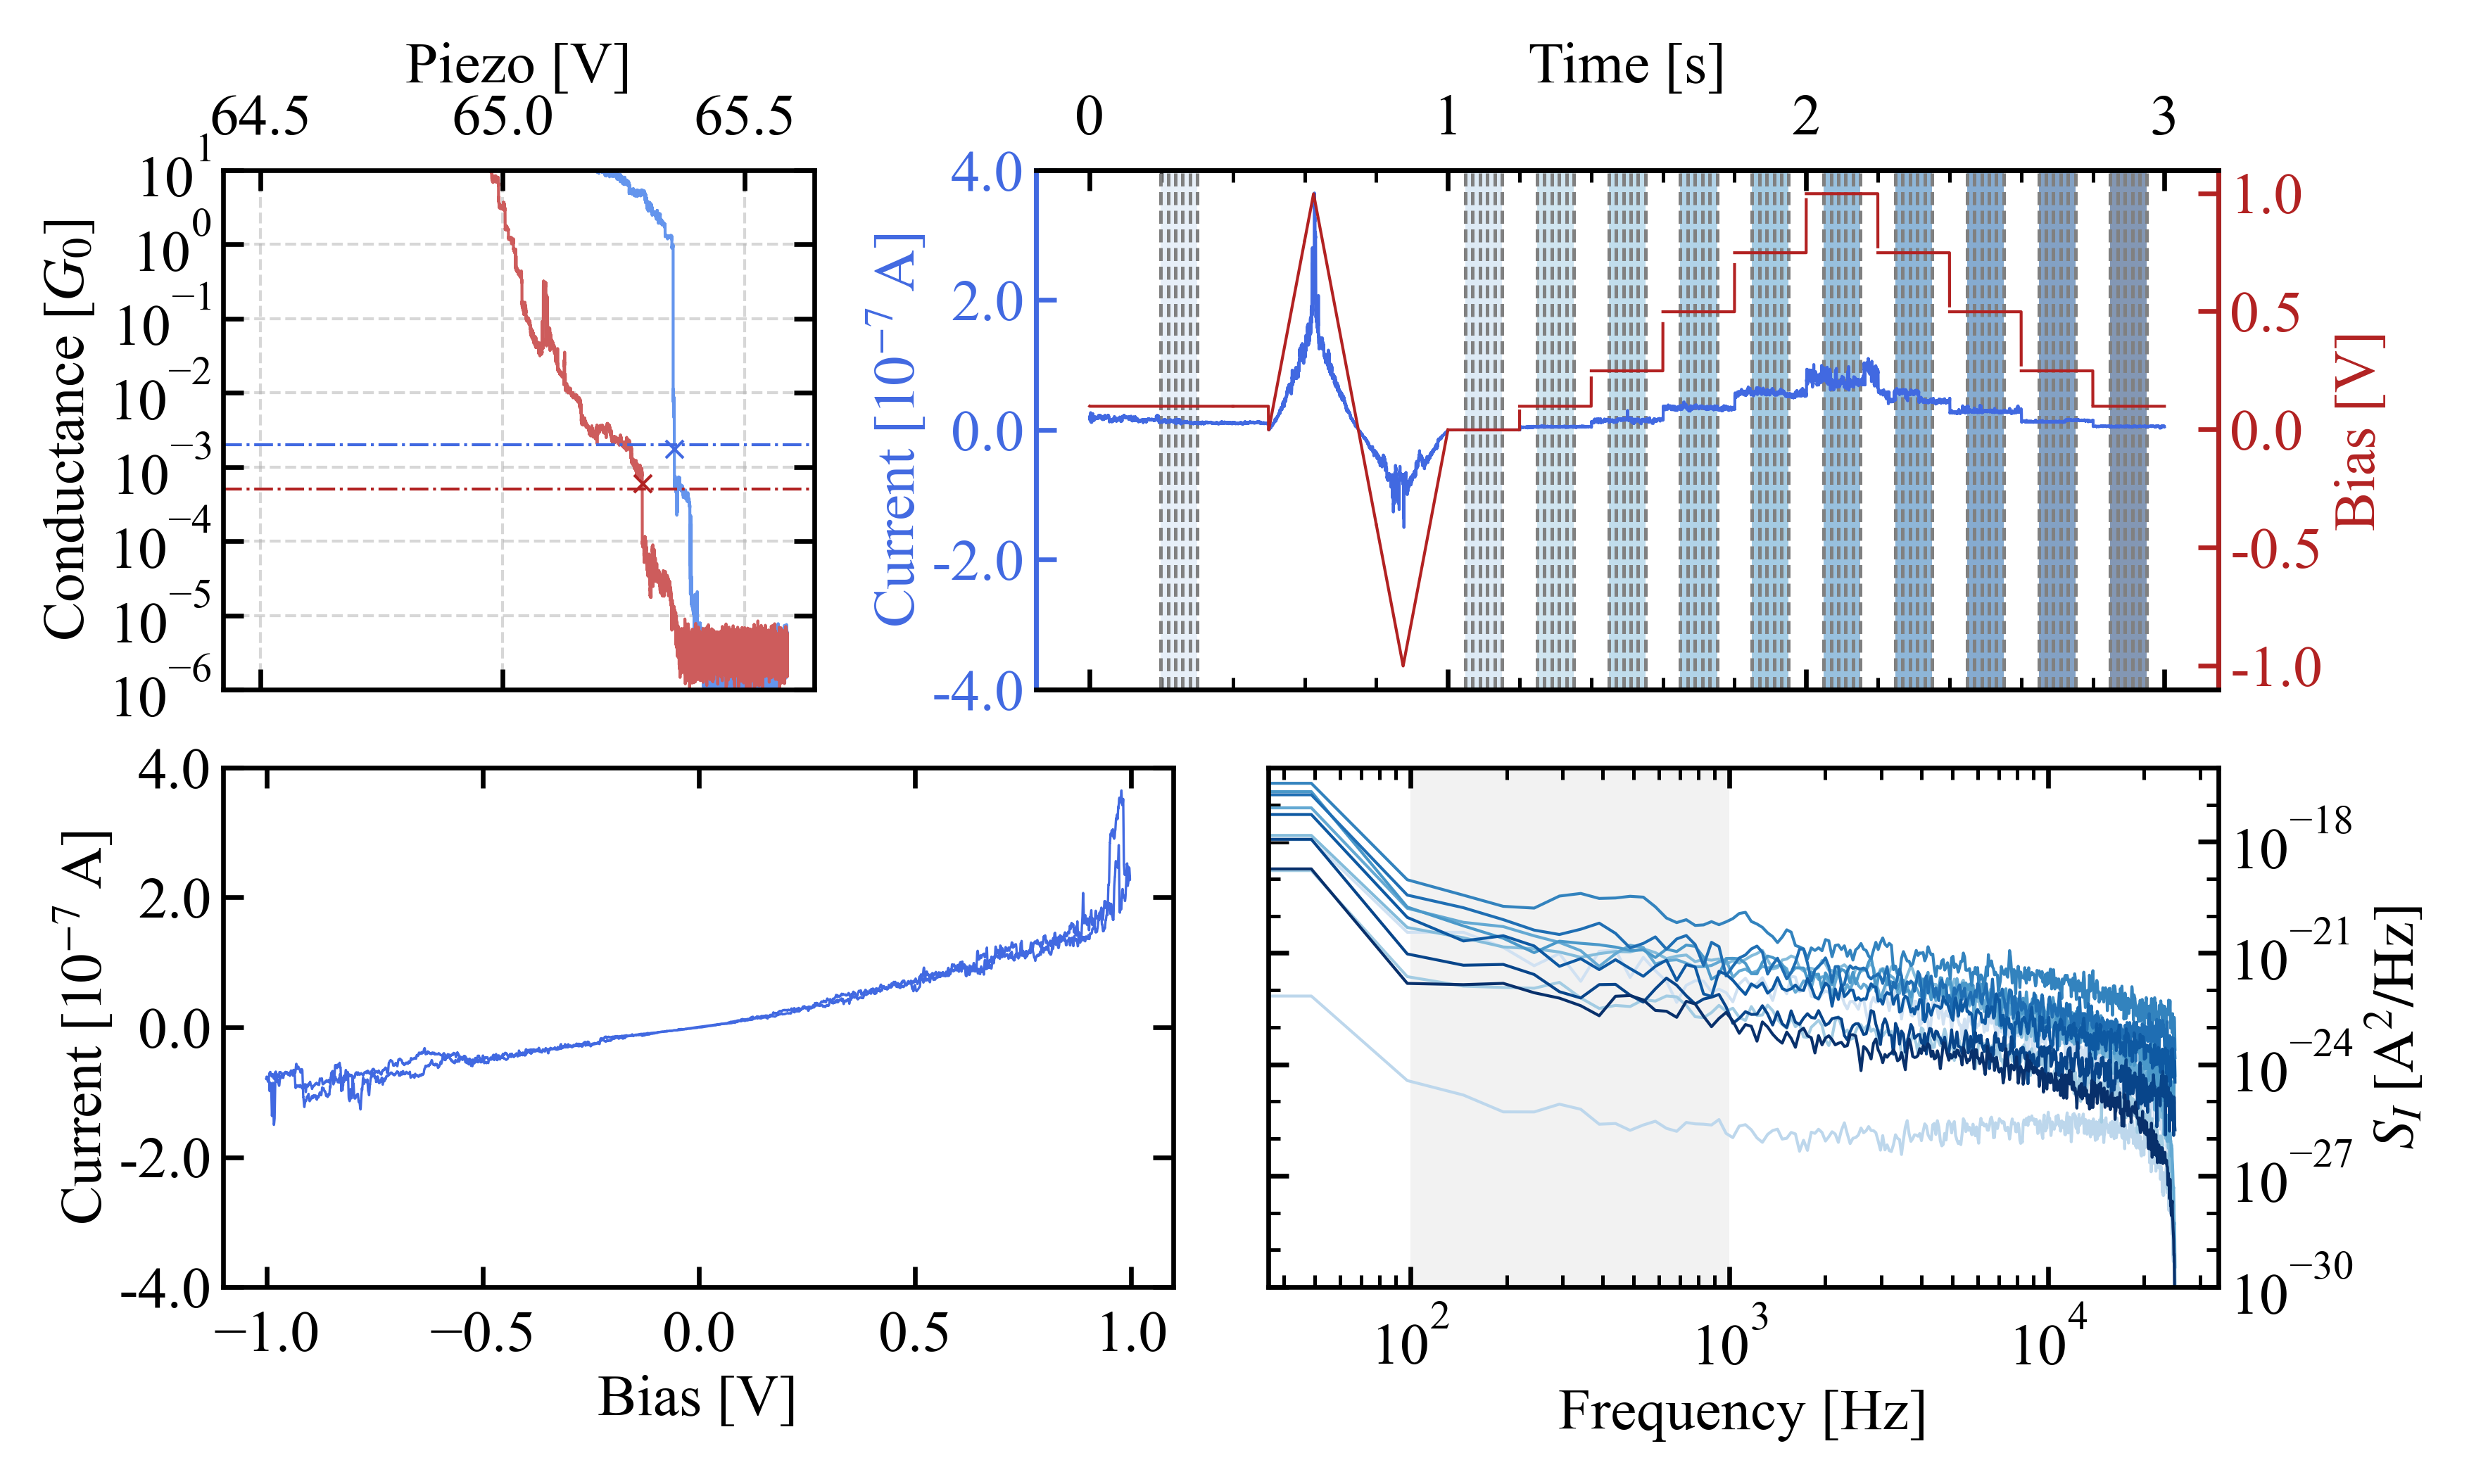

In [231]:
which_trace = iv_good_pull[0]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=trace_pair.R_serial, min_step_len=8000, min_height=1, iv=0)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)
selected_colors_pull = colormaps['Blues'](np.linspace(0.2, 1, hold_trace.bias_steps.shape[0]))
selected_colors_push = colormaps['Reds'](np.linspace(0.2, 1, hold_trace.bias_steps.shape[0]))

plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='pull',
                          smoothing=10, color_list=selected_colors_pull)

# ax_iv.set_ylim(-1e-7, 1e-7, 1)
print(filter_traces.iv_difference(hold_trace, direction='pull', smoothing=100))

0.4962998241426372


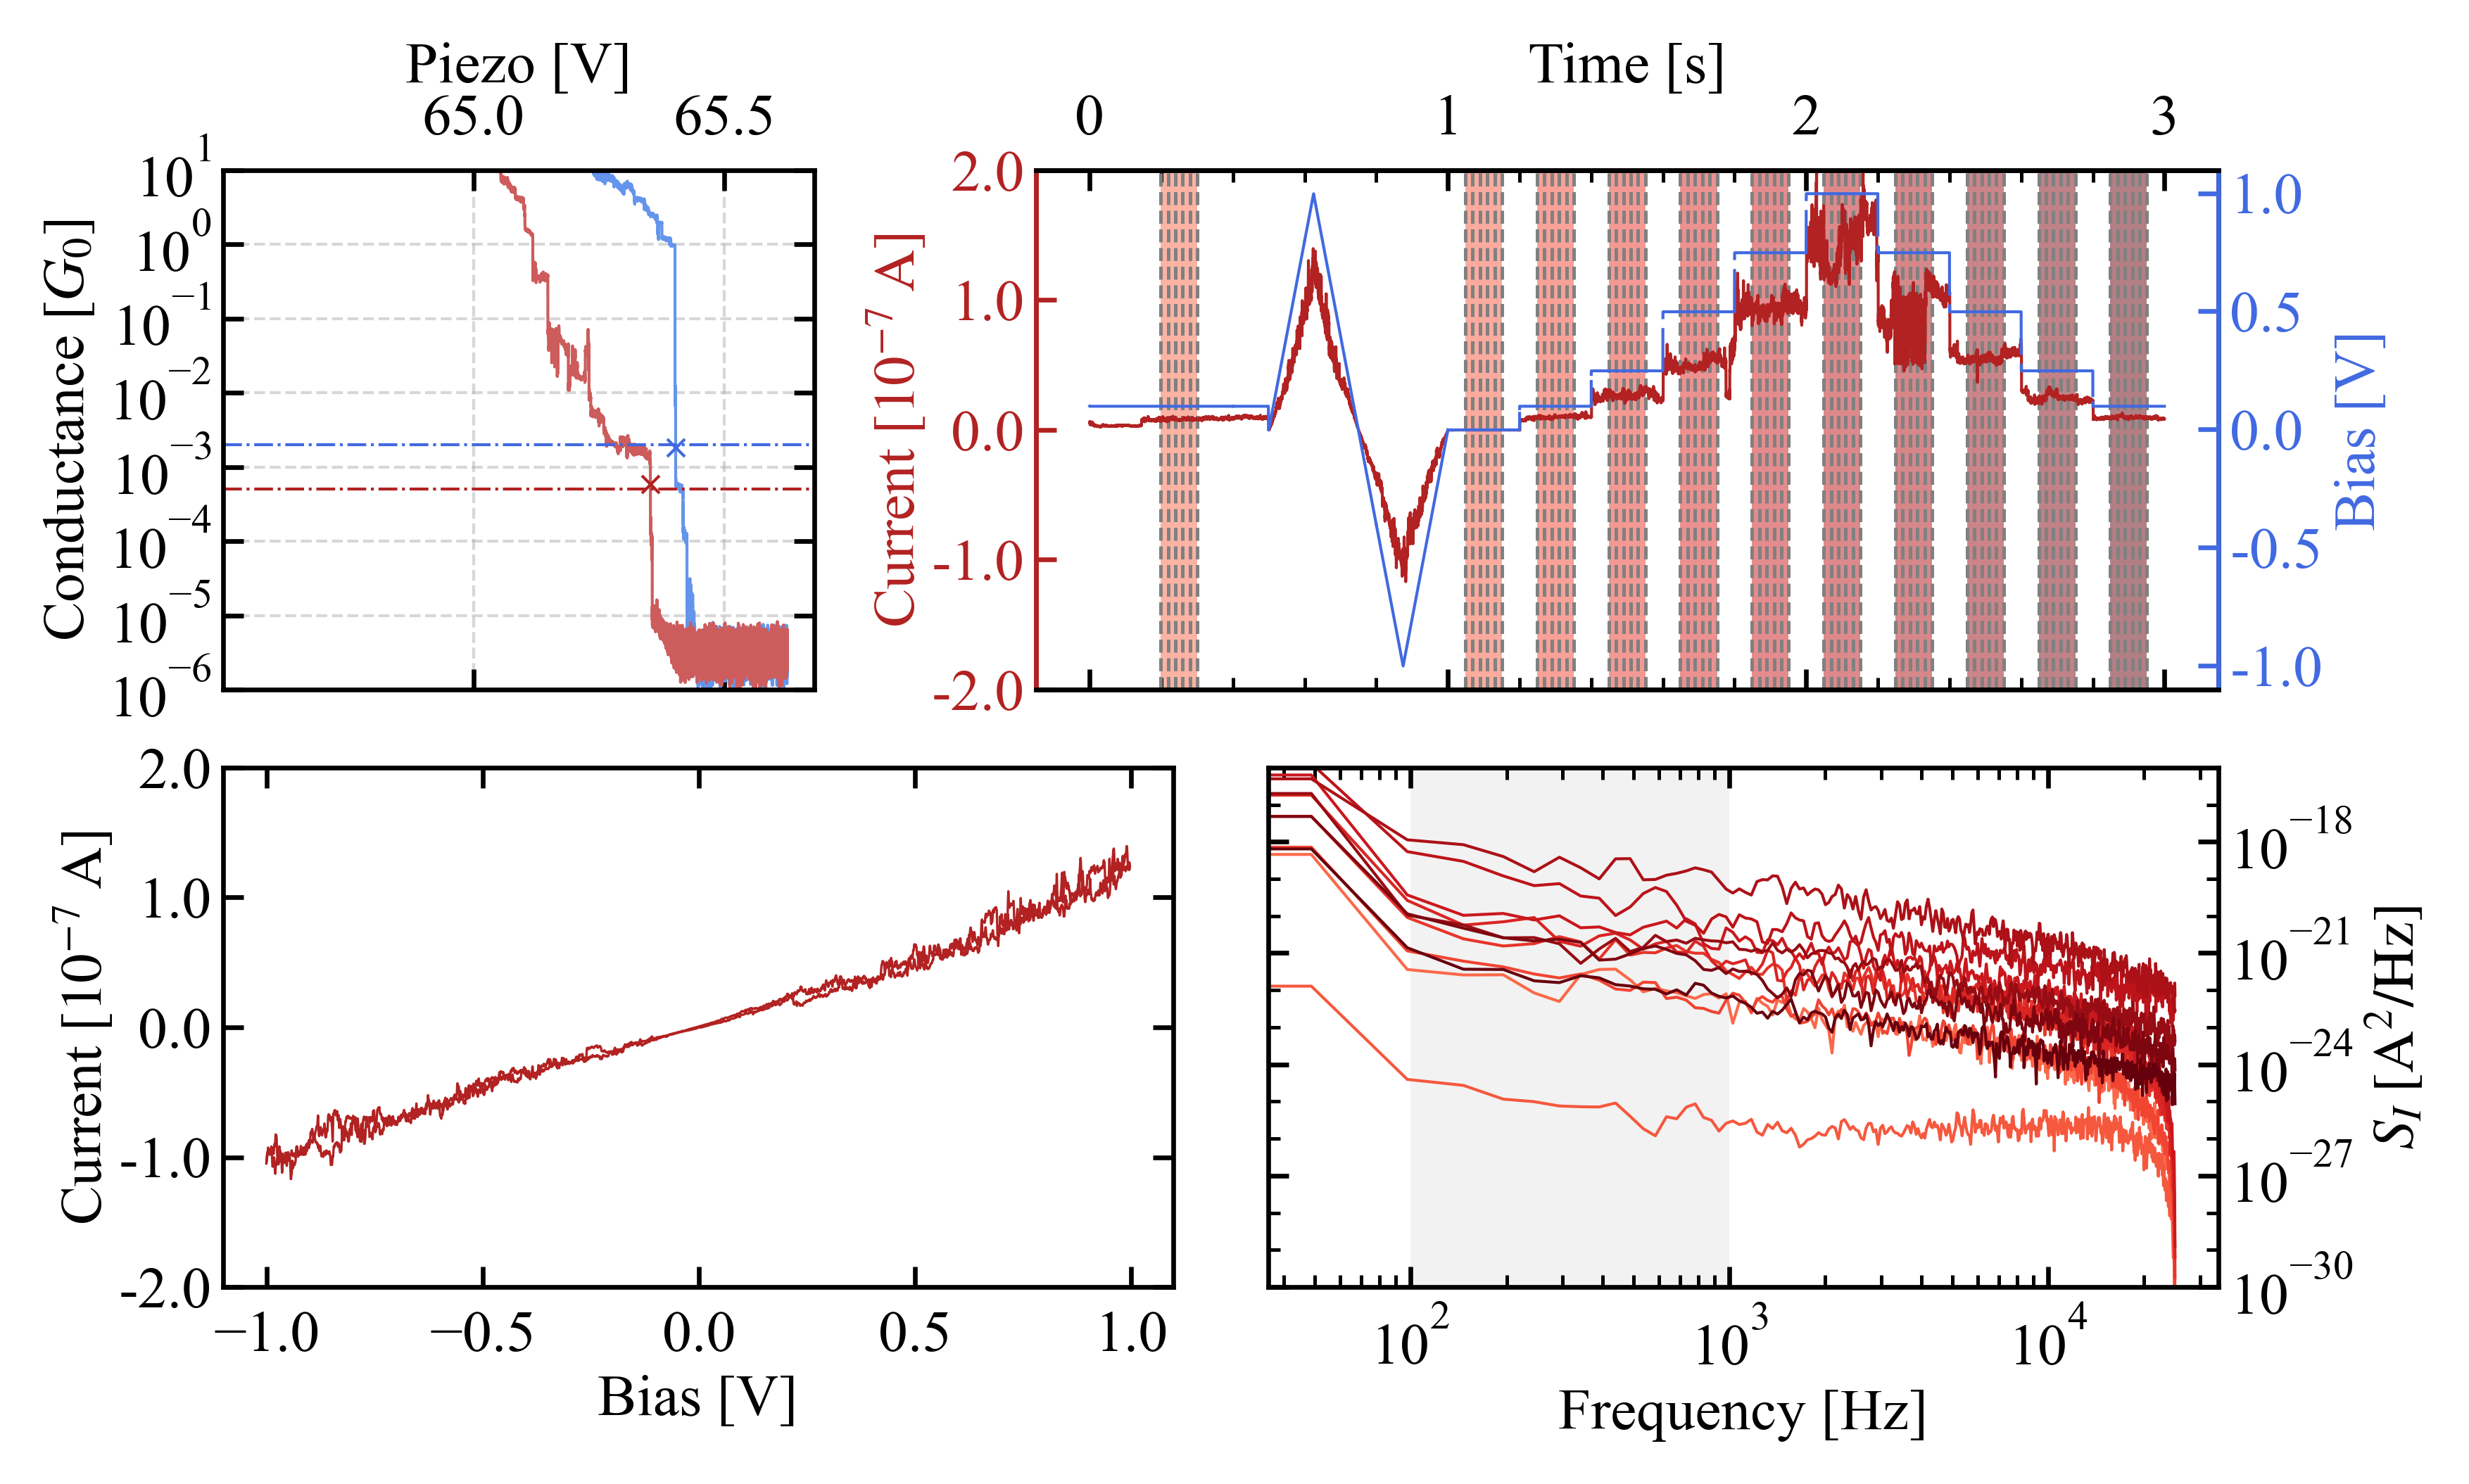

In [234]:
which_trace = iv_good_push[0]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=trace_pair.R_serial, min_step_len=8000, min_height=1, iv=0)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)
selected_colors_pull = colormaps['Blues'](np.linspace(0.5, 1, hold_trace.bias_steps.shape[0]))
selected_colors_push = colormaps['Reds'](np.linspace(0.5, 1, hold_trace.bias_steps.shape[0]))

plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='push',
                          smoothing=10, color_list=selected_colors_push)

print(filter_traces.iv_difference(hold_trace, direction='push', smoothing=100))